In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### Undirected graph

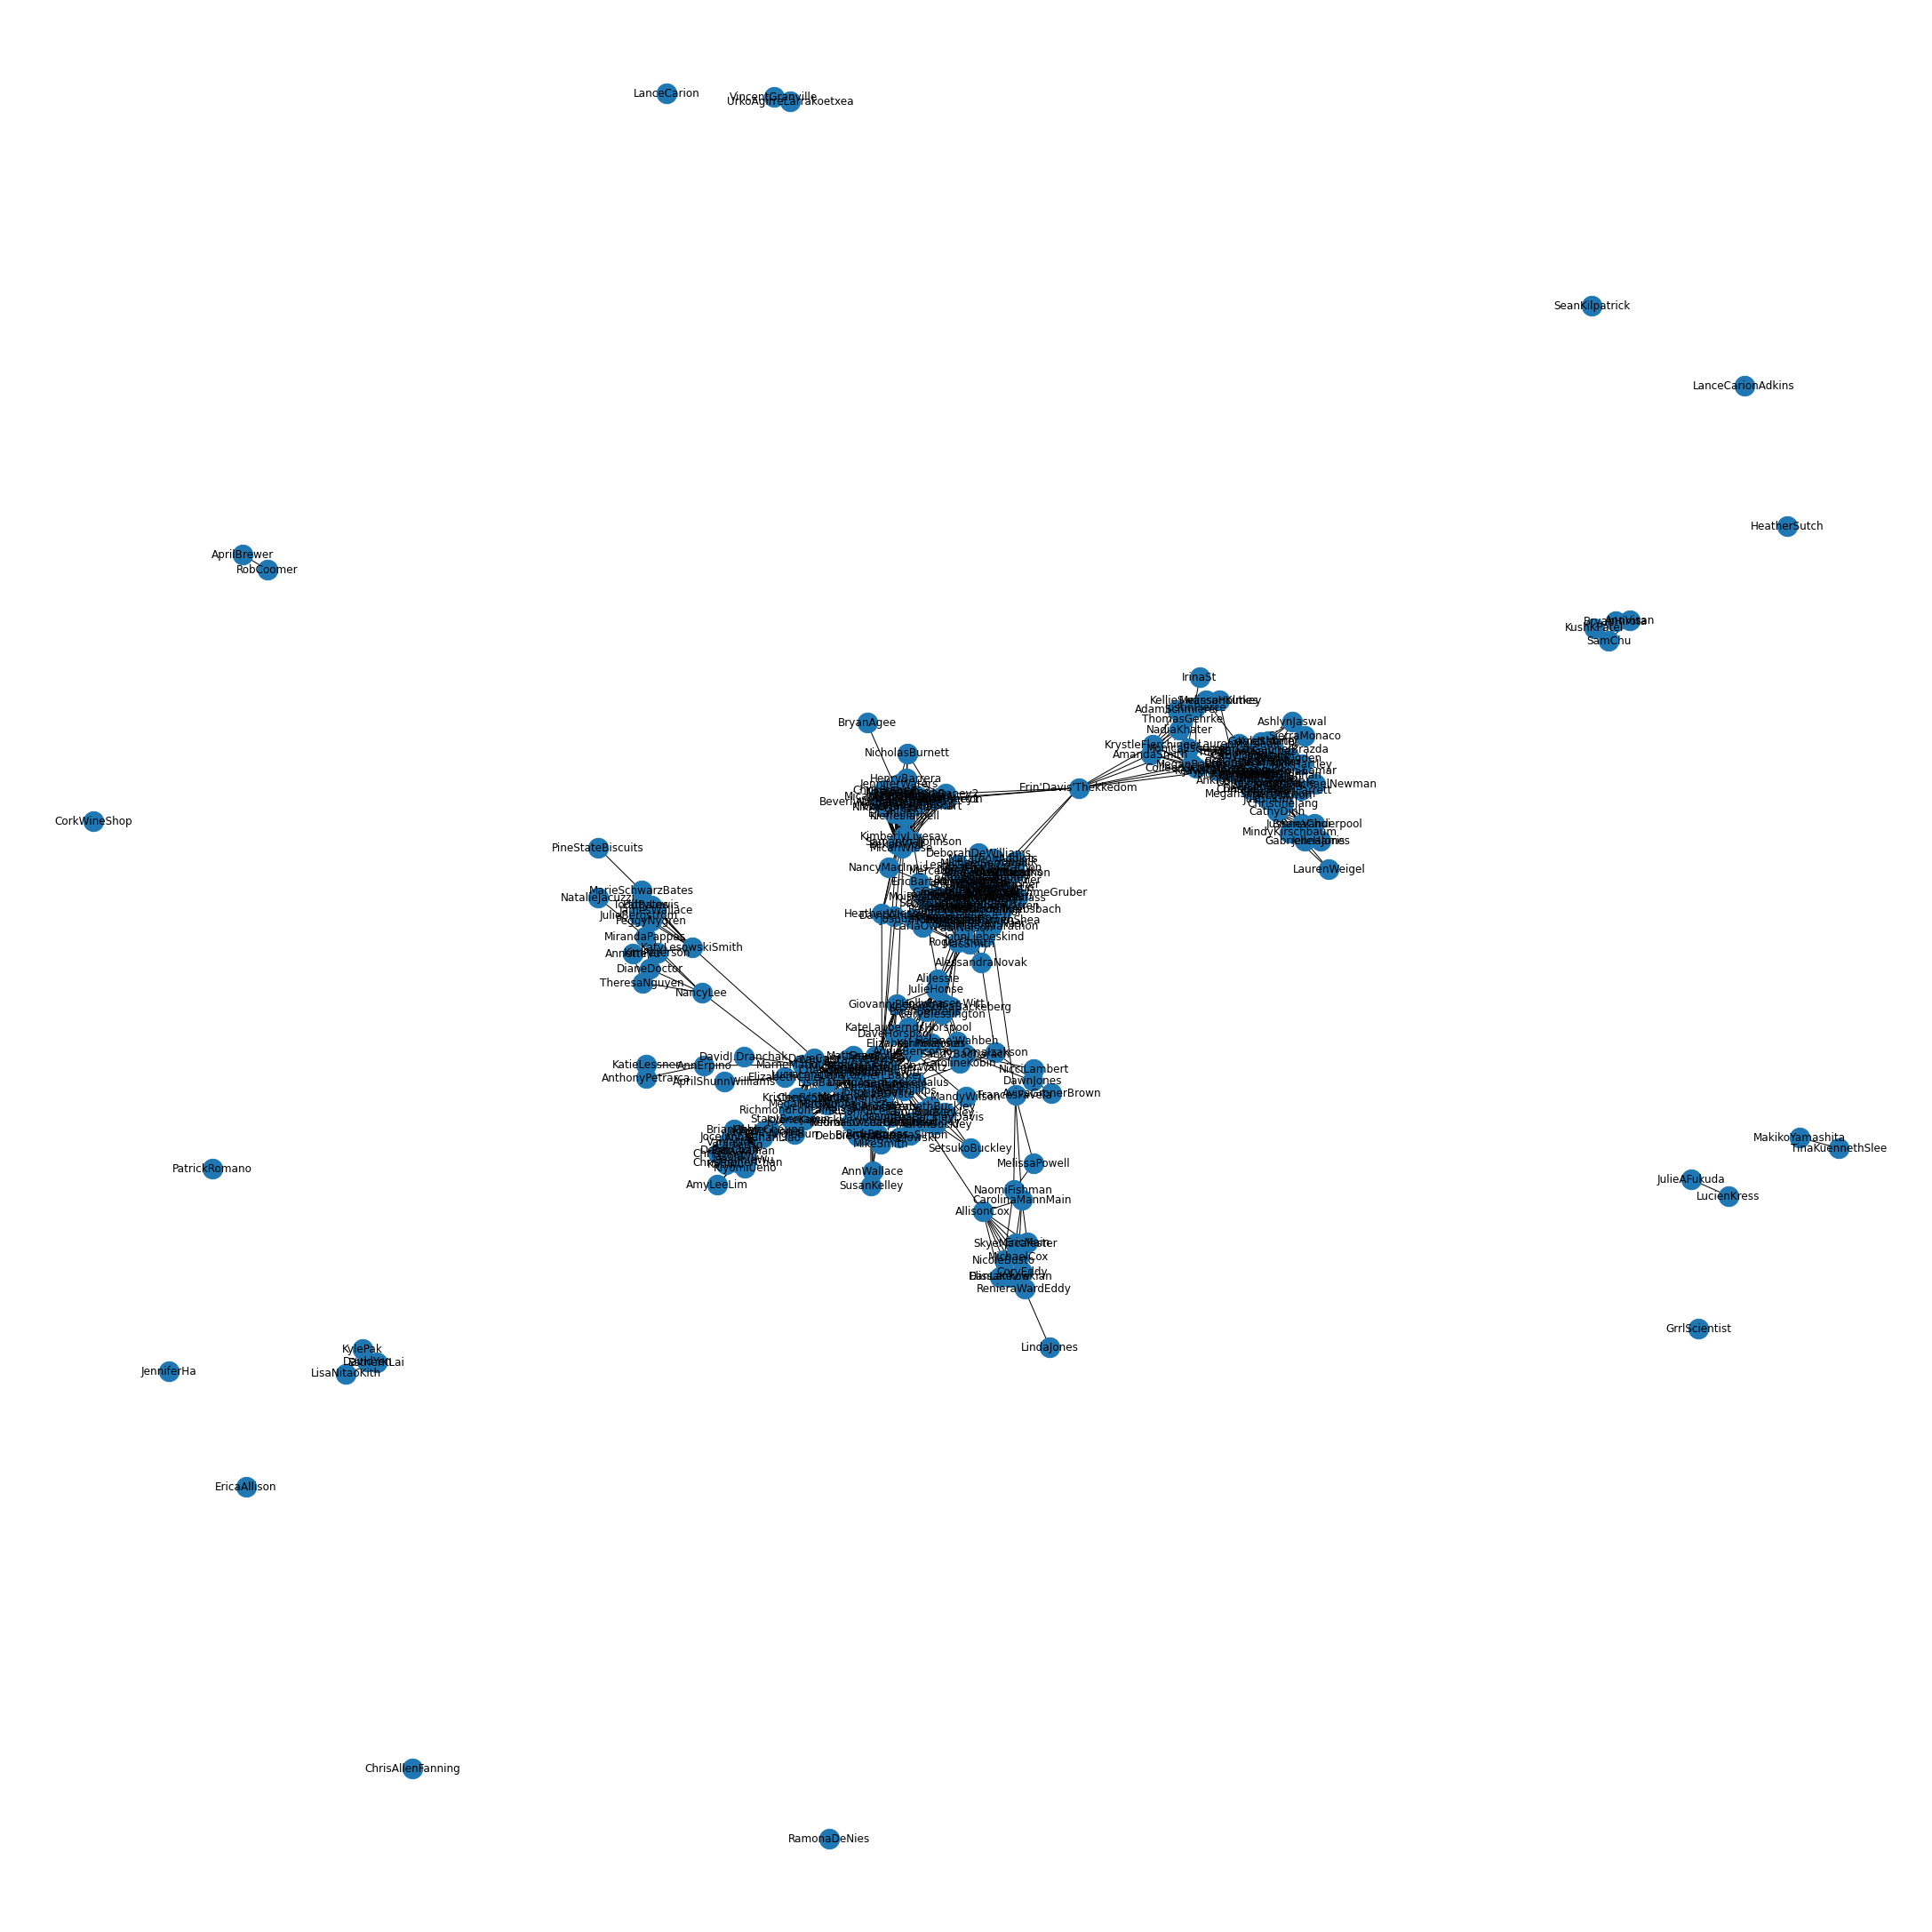

In [2]:
g  = nx.read_gml("PersonalFriendNetwork2.gml")
plt.figure(figsize=(30,30))
nx.draw(g, node_size=500, with_labels=True)
plt.show()

In [3]:
# get the name of nodes and store them in a list "g_nodes"
g_nod = g.nodes()
g_nodes = [i for i in g.nodes()]

In [4]:
# compute the number of nodes
g_nodes_number = g.number_of_nodes()
g_nodes_number

314

#### 1. average shortest path length
In this part, we calculate and compare the average shortest path length of the undirected graph and its radomised graph
 <br>
- calculate the average shortest path length for each node
- calculate the number of nodes which have paths with each node
- get the nodes which are connected with most of the nodes and have the least average shortest path length

If the average shortest path length for a node is low, then it is much easier to reach other nodes.<br>
We also calculate the above steps of the randomised network.<br>
It is used to compare with the original network, showing that the average shortest path length can distinguish nodes which have greater influences.

In [5]:
# function to calculate the average shortest path for each nodes
def path(i):
    sum_0=0
    num_0=0
    for j in range(g_nodes_number):
        if nx.has_path(g, source=g_nodes[i], target=g_nodes[j])==True:
            sum_0 += nx.shortest_path_length(g, source=g_nodes[i], target=g_nodes[j])
            num_0 += 1
    return sum_0/num_0, num_0

In [6]:
# compute the average shortest path for each node and the number of reachable nodes
sum_list=[]
num_list=[]
for i in range(g_nodes_number):
    a,b = path(i)
    sum_list.append(a)
    num_list.append(b)

In [7]:
for i in range(g_nodes_number):
    print("average shortest path length for", g_nodes[i], "is", sum_list[i])
    print("number of reachable nodes is", num_list[i])

average shortest path length for ChristopherChan is 5.132404181184669
number of reachable nodes is 287
average shortest path length for ClarissaSimon is 4.275261324041812
number of reachable nodes is 287
average shortest path length for KatiWu is 5.128919860627177
number of reachable nodes is 287
average shortest path length for CarlaOwen is 4.439024390243903
number of reachable nodes is 287
average shortest path length for KevinDouglas is 4.696864111498257
number of reachable nodes is 287
average shortest path length for BenAldred is 4.2717770034843205
number of reachable nodes is 287
average shortest path length for ColleenSchoonover is 4.188153310104529
number of reachable nodes is 287
average shortest path length for KrystleFlerchinger is 4.355400696864112
number of reachable nodes is 287
average shortest path length for JustinPierce is 5.146341463414634
number of reachable nodes is 287
average shortest path length for NaomiFishman is 5.334494773519164
number of reachable nodes is 

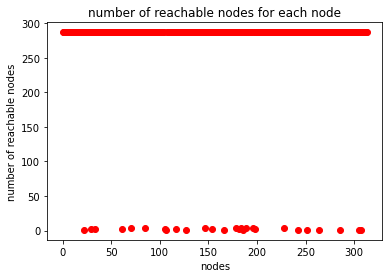

In [8]:
# plot the number of reachable nodes
for i in range(g_nodes_number):
    plt.scatter(i, num_list[i], c='r')
plt.xlabel("nodes")
plt.ylabel("number of reachable nodes")
plt.title("number of reachable nodes for each node")
plt.show()

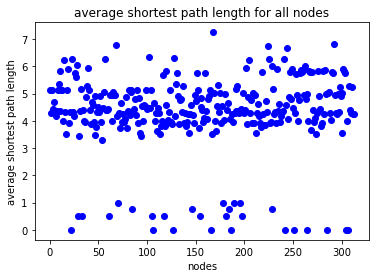

In [9]:
# plot the average shortest path length for all nodes
for i in range(g_nodes_number):
    plt.scatter(i, sum_list[i], c='b')
plt.xlabel("nodes")
plt.ylabel("average shortest path length")
plt.title("average shortest path length for all nodes")
plt.show()

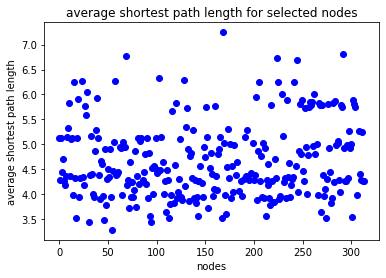

In [10]:
# plot the average shortest path length for nodes which is connected with over 250 nodes
c_list=[10]*g_nodes_number
for i in range(g_nodes_number):
    if num_list[i]>250:
        c_list[i]=sum_list[i]
        plt.scatter(i, sum_list[i], c='b')
    else:
        g.remove_node(g_nodes[i])
plt.xlabel("nodes")
plt.ylabel("average shortest path length")
plt.title("average shortest path length for selected nodes")
plt.show()

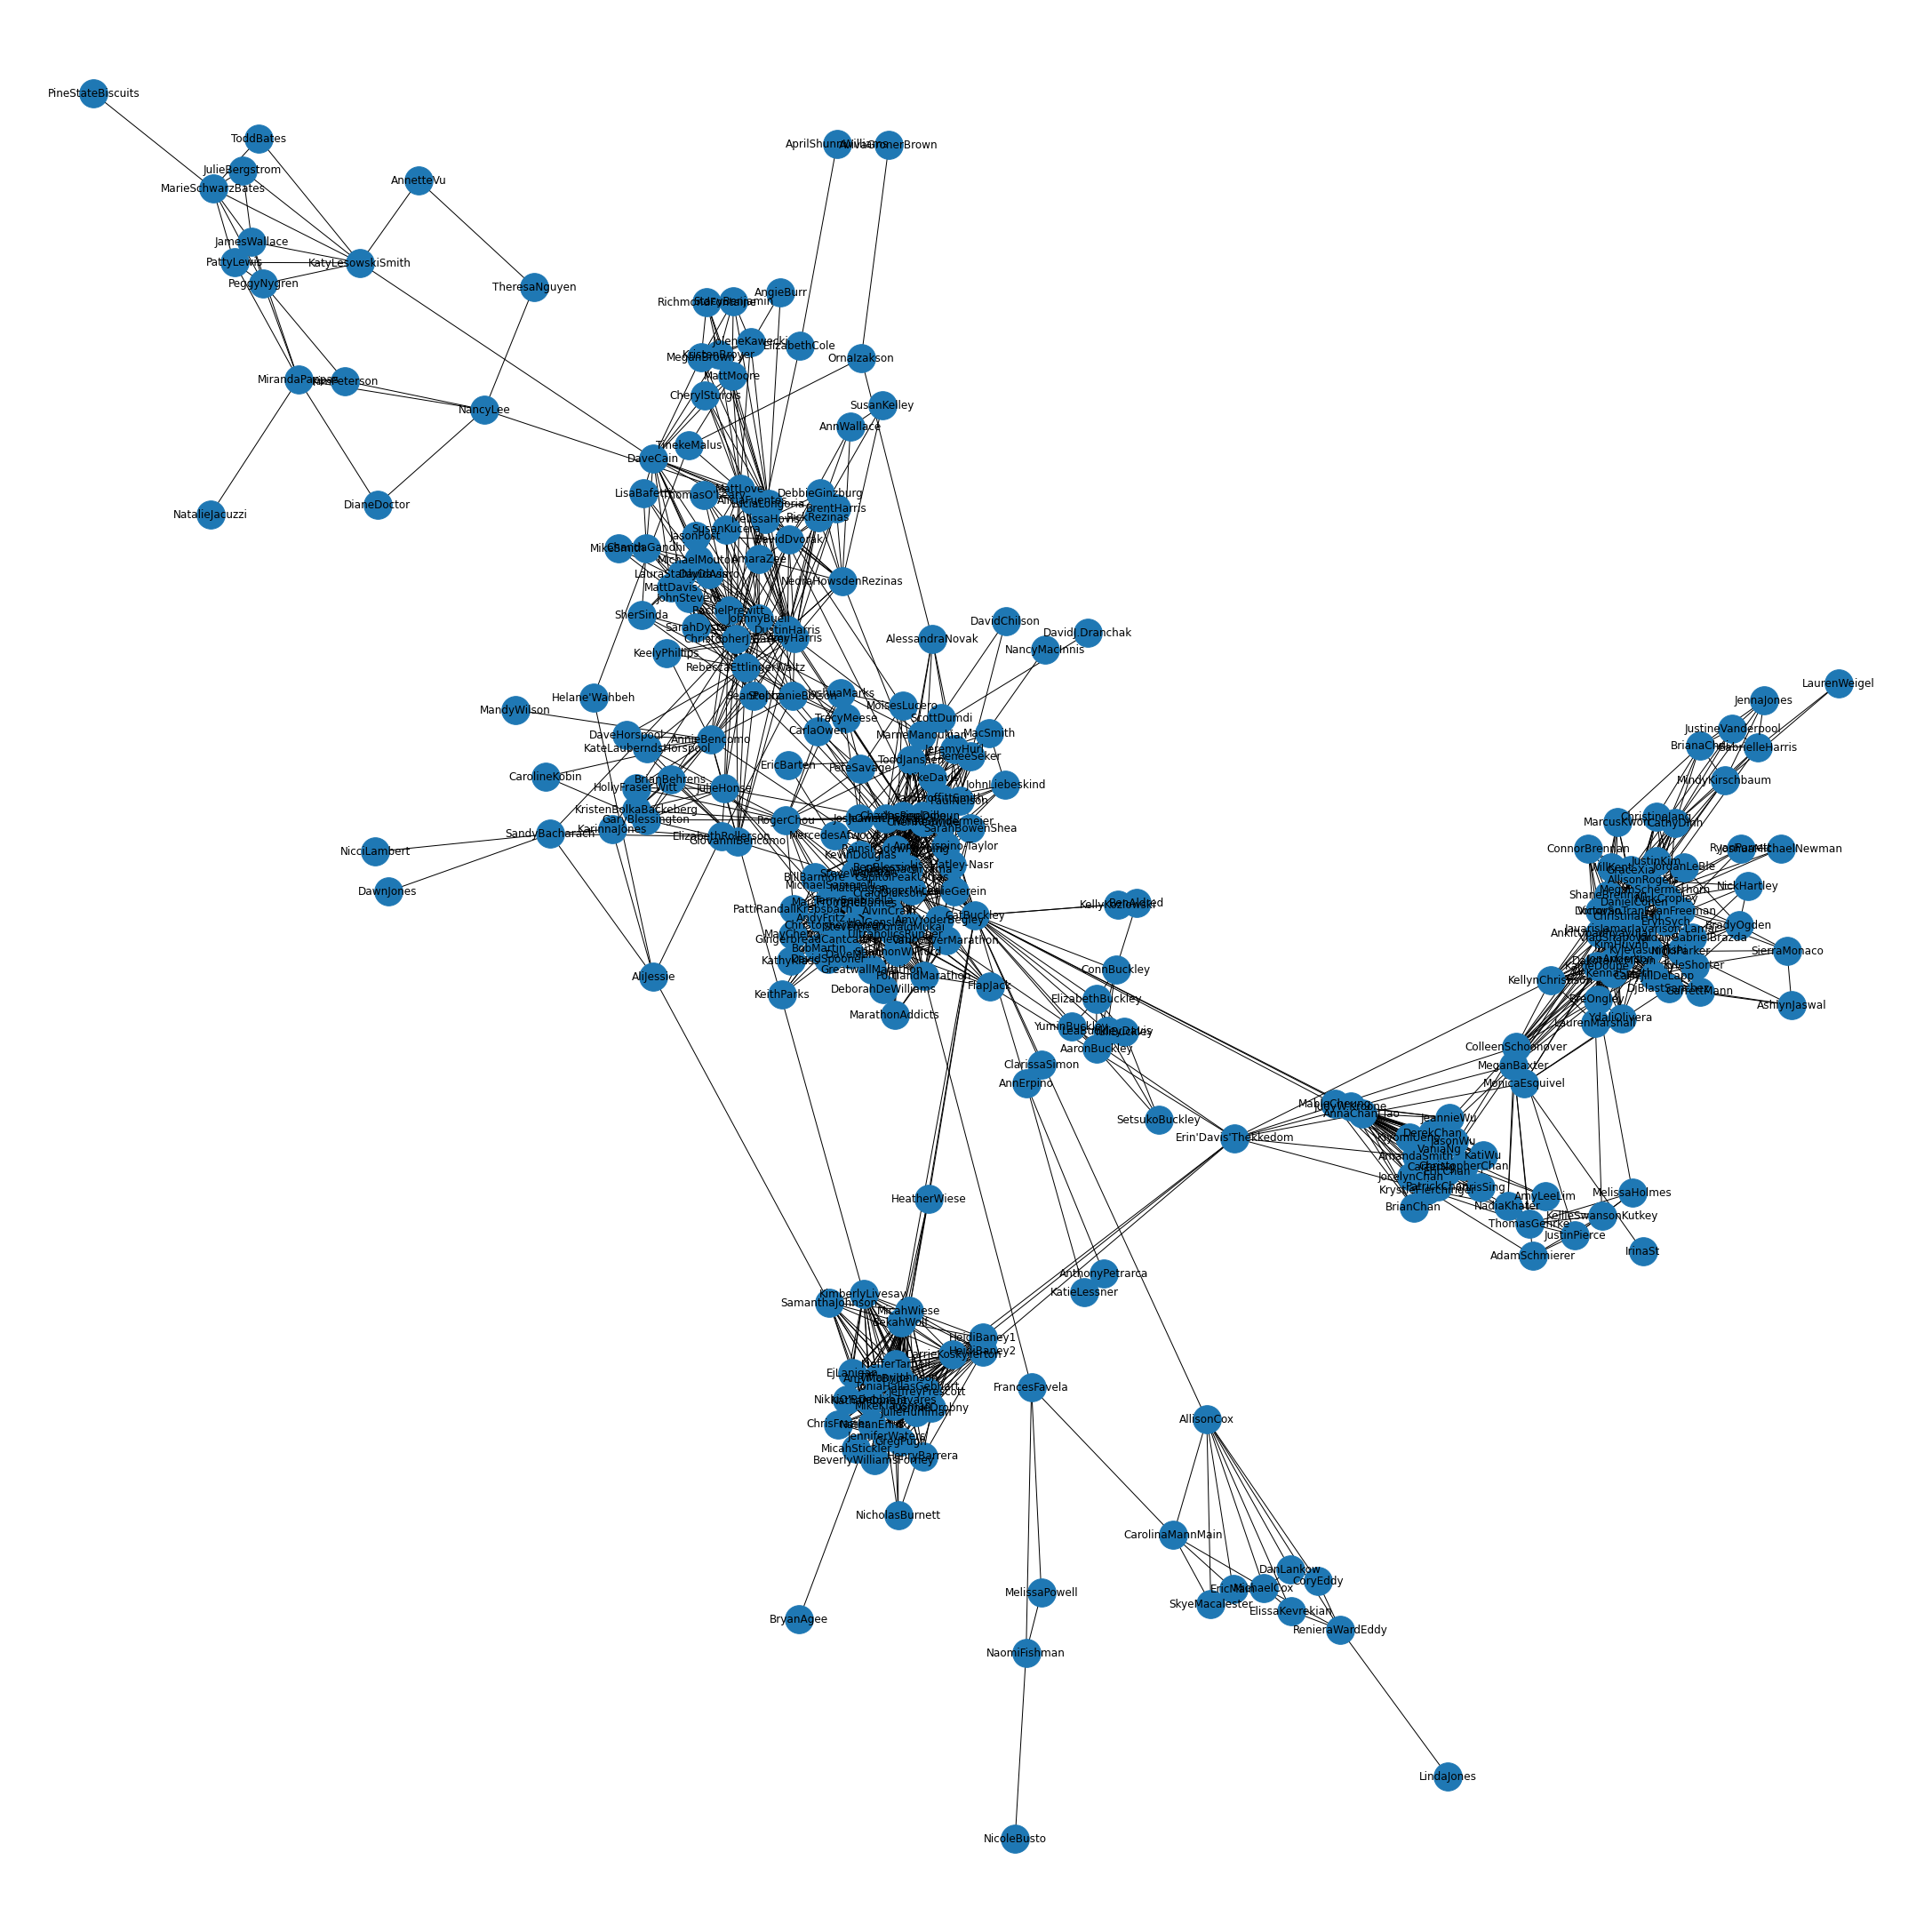

In [11]:
# plot the new graph
plt.figure(figsize=(30,30))
nx.draw(g, node_size=1000, with_labels=True)
plt.show()

In [12]:
# get the name of nodes and store them in a list "g_nodes"
g_nod = g.nodes()
g_nodes = [i for i in g.nodes()]

In [13]:
# compute the number of nodes
g_nodes_number = g.number_of_nodes()
g_nodes_number

287

In [14]:
# find the nodes with minimal average shortest path length
min_path=min(c_list)
for i in range(g_nodes_number):
    if min_path==c_list[i]:
        print(g_nodes[i])
        print(c_list[i])
        c_list[i]=10
        break

AnnetteVu
3.2822299651567945


In [15]:
min_path=min(c_list)
for i in range(g_nodes_number):
    if min_path==c_list[i]:
        print(g_nodes[i])
        print(c_list[i])
        c_list[i]=10
        break

AdamSchmierer
3.4355400696864113


In [16]:
min_path=min(c_list)
for i in range(g_nodes_number):
    if min_path==c_list[i]:
        print(g_nodes[i])
        print(c_list[i])
        c_list[i]=10
        break

KathyKlass
3.4355400696864113


In [17]:
min_path=min(c_list)
for i in range(g_nodes_number):
    if min_path==c_list[i]:
        print(g_nodes[i])
        print(c_list[i])
        c_list[i]=10
        break

KeelyPhillips
3.484320557491289


In [18]:
min_path=min(c_list)
for i in range(g_nodes_number):
    if min_path==c_list[i]:
        print(g_nodes[i])
        print(c_list[i])
        c_list[i]=10
        break

McKennaSpieth
3.5121951219512195


So, the top 5 influential spreader using the average shortest path are:<br>
AnnetteVu, AdamSchmierer, KathyKlass, KeelyPhillips and McKennaSpieth

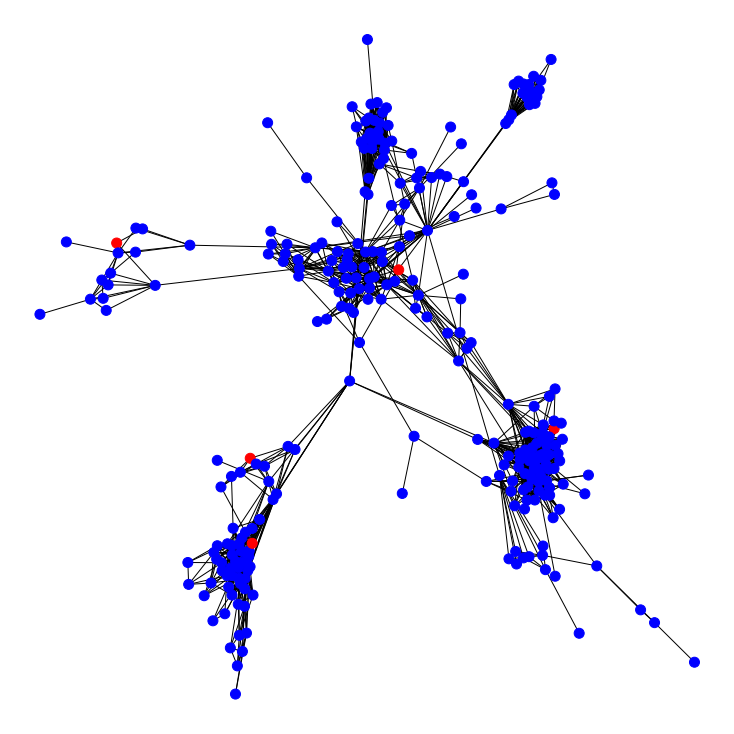

In [19]:
for i in range(g_nodes_number):
    a=g_nodes[i]
    g.nodes[a]['color'] ='b'
g.nodes['AnnetteVu']['color'] ='r'
g.nodes['AdamSchmierer']['color'] ='r'
g.nodes['KathyKlass']['color'] ='r'
g.nodes['KeelyPhillips']['color'] ='r'
g.nodes['McKennaSpieth']['color'] ='r'
plt.figure(figsize=(10,10))
nx.draw(g, node_size=100, node_color = [g.nodes[v]['color'] for v in g.nodes()])
plt.show()

In [20]:
# compare with randomised network
g1 = nx.read_gml("PersonalFriendNetwork2.gml")
gr=nx.algorithms.smallworld.random_reference(g1,niter = 10, connectivity=False)

In [21]:
# get the name of nodes and store them in a list "g_nodes"
gr_nod = gr.nodes()
gr_nodes = [i for i in gr.nodes()]

In [22]:
# compute the number of nodes
gr_nodes_number = gr.number_of_nodes()
gr_nodes_number

314

In [23]:
# function to calculate the average shortest path for each node
def pathr(i):
    sum_0=0
    num_0=0
    for j in range(gr_nodes_number):
        if nx.has_path(gr, source=gr_nodes[i], target=gr_nodes[j])==True:
            sum_0 += nx.shortest_path_length(gr, source=gr_nodes[i], target=gr_nodes[j])
            num_0 += 1
    return sum_0/num_0, num_0

In [24]:
# compute the average shortest path for each node and the number of reachable nodes
sum_list=[]
num_list=[]
for i in range(gr_nodes_number):
    a,b = pathr(i)
    sum_list.append(a)
    num_list.append(b)

In [25]:
for i in range(gr_nodes_number):
    print("average shortest path length for", gr_nodes[i], "is", sum_list[i])
    print("number of reachable nodes is", num_list[i])

average shortest path length for ChristopherChan is 2.607260726072607
number of reachable nodes is 303
average shortest path length for ClarissaSimon is 3.541254125412541
number of reachable nodes is 303
average shortest path length for KatiWu is 2.594059405940594
number of reachable nodes is 303
average shortest path length for CarlaOwen is 2.910891089108911
number of reachable nodes is 303
average shortest path length for KevinDouglas is 2.372937293729373
number of reachable nodes is 303
average shortest path length for BenAldred is 3.145214521452145
number of reachable nodes is 303
average shortest path length for ColleenSchoonover is 2.448844884488449
number of reachable nodes is 303
average shortest path length for KrystleFlerchinger is 2.706270627062706
number of reachable nodes is 303
average shortest path length for JustinPierce is 2.7194719471947195
number of reachable nodes is 303
average shortest path length for NaomiFishman is 2.9933993399339935
number of reachable nodes is

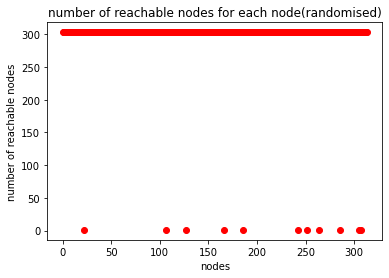

In [26]:
# plot the number of reachable nodes
for i in range(gr_nodes_number):
    plt.scatter(i, num_list[i], c='r')
plt.xlabel("nodes")
plt.ylabel("number of reachable nodes")
plt.title("number of reachable nodes for each node(randomised)")
plt.show()

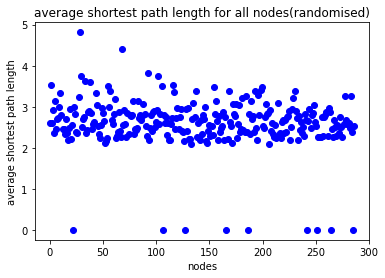

In [27]:
# plot the average shortest path length for all nodes
for i in range(g_nodes_number):
    plt.scatter(i, sum_list[i], c='b')
plt.xlabel("nodes")
plt.ylabel("average shortest path length")
plt.title("average shortest path length for all nodes(randomised)")
plt.show()

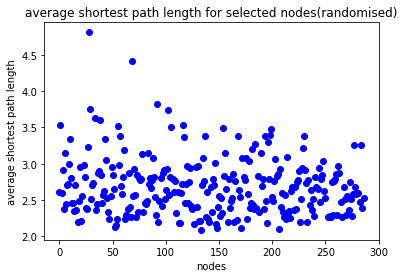

In [28]:
# plot the average shortest path length for nodes which is connected with over 250 nodes
c_list=[10]*g_nodes_number
for i in range(g_nodes_number):
    if num_list[i]>250:
        c_list[i]=sum_list[i]
        plt.scatter(i, sum_list[i], c='b')
plt.xlabel("nodes")
plt.ylabel("average shortest path length")
plt.title("average shortest path length for selected nodes(randomised)")
plt.show()

As we can see, the average shortest path lengths are much smaller than the network before randomise.<br>
Showing that the original network can distinguish the influential spreaders better.

#### 2. clustering coefficient
In this part, we calculate the clustering coefficient for each node.<br>
Clustering coefficient shows whether nodes are highly connected with its neighbors.<br>
If the clustering coefficient of a node is high, this node is more likely to be a center of some nodes. So it is an influential spreader in a part of the graph.

In [29]:
# compute the clustering coefficient for each nodes
g_clustering = nx.clustering(g)
g_clu=[g_clustering[g_nodes[i]] for i in range(g_nodes_number)]
g_clustering

{'ChristopherChan': 0.7777777777777778,
 'ClarissaSimon': 0,
 'KatiWu': 0.8727272727272727,
 'CarlaOwen': 0.8333333333333334,
 'KevinDouglas': 0.695906432748538,
 'BenAldred': 1.0,
 'ColleenSchoonover': 0.42857142857142855,
 'KrystleFlerchinger': 0.6190476190476191,
 'JustinPierce': 0.4666666666666667,
 'NaomiFishman': 0.3333333333333333,
 'TheresaNguyen': 0,
 'AmandaSmith': 0.8,
 'EricChan': 0.7714285714285715,
 'DerekChan': 0.8241758241758241,
 'DonnieDrobny': 0.7916666666666666,
 'JamesWallace': 0.6666666666666666,
 'BenBlessing': 0.6142857142857143,
 'BekahWolf': 0.5538461538461539,
 'PatrickChan': 0.8589743589743589,
 'MelissaHolmes': 0.5,
 'CraigDickson': 0.5218390804597701,
 "NikkiO'Brien": 0.9090909090909091,
 'JulieBergstrom': 1.0,
 'CarolinaMannMain': 0.4,
 'JudyW.Kroone': 0.6916666666666667,
 'JustinKim': 0.6483516483516484,
 'AprilShunnWilliams': 0,
 'LindaJones': 0,
 'GiovanniBencomo': 0.42424242424242425,
 'RickRezinas': 0.6111111111111112,
 'AdamSchmierer': 0.33333333333

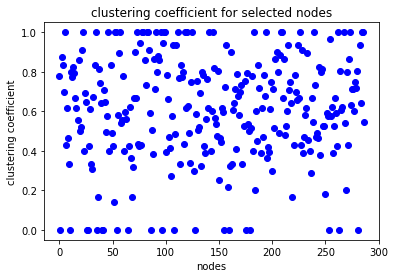

In [30]:
# plot the clustering coefficient
for i in range(g_nodes_number):
    plt.scatter(i,g_clu[i],c='b')
plt.xlabel("nodes")
plt.ylabel("clustering coefficient")
plt.title("clustering coefficient for selected nodes")
plt.show()

In [31]:
clu_max = max(g_clu)
clu_max

1.0

In [32]:
clu_list=[]
for i in range(g_nodes_number):
    if g_clu[i]==clu_max:
        print(g_nodes[i])
        clu_list.append(g_nodes[i])

BenAldred
JulieBergstrom
RichmondFontaine
KeelyPhillips
CarolineKobin
ElissaKevrekian
NicholasBurnett
AngieBurr
DanLankow
KiyomiUeno
SusanKelley
DaveHorspool
CherylSturgis
KeithParks
ChrisSing
DebbieGinzburg
DianeDoctor
ToddBates
MelissaPowell
EricMain
BrianChan
SkyeMacalester
TracyMeese
MikeSmith
AnthonyPetrarca
AmyLeeLim
EricBarten
KatieLessner
CoryEddy
LaurenWeigel
DavidChilson
SetsukoBuckley
YuminBuckley


The nodes above are local influencial spraders.

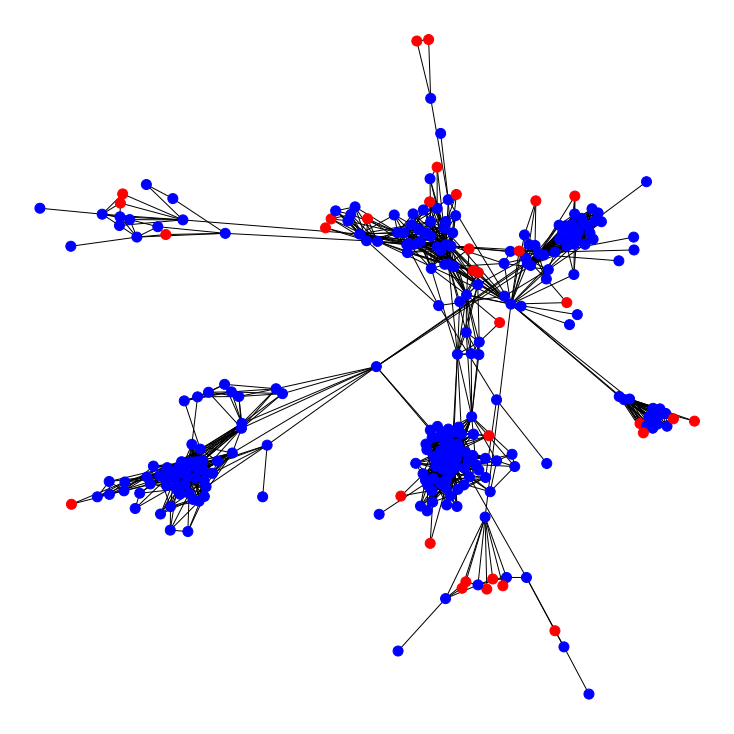

In [33]:
for i in range(g_nodes_number):
    a=g_nodes[i]
    g.nodes[a]['color'] ='b'
for i in range(len(clu_list)):
    a=clu_list[i]
    g.nodes[a]['color'] ='r'
plt.figure(figsize=(10,10))
nx.draw(g, node_size=100, node_color = [g.nodes[v]['color'] for v in g.nodes()])
plt.show()

In [34]:
# compute the degree assortativity coefficient for the undirected graph
nx.degree_assortativity_coefficient(g)

0.18973418034465836

#### 3. centrality
In this part, we calculate the degree centrality, betweenness centrality, closeness centrality and eigenvector centrality.
- If degree centrality of a node is high, it is connected with many nodes. So, it is an influential spreader.
- Nodes with high betweenness have a large influence on the flow of information through the network.
- Closeness centrality is stating that the importance of a node is given by how short are the distances from it to all others. So, we consider the node with minimal closeness centrality is an influential spreader.
- The eigenvector centrality assumes that if a node is connected to important nodes, then it is important.

In [35]:
# compute the degree centrality for each nodes
dc = nx.degree_centrality(g)
g_deg_c=[dc[g_nodes[i]] for i in range(g_nodes_number)]
dc

{'ChristopherChan': 0.03496503496503497,
 'ClarissaSimon': 0.0034965034965034965,
 'KatiWu': 0.038461538461538464,
 'CarlaOwen': 0.013986013986013986,
 'KevinDouglas': 0.06643356643356643,
 'BenAldred': 0.006993006993006993,
 'ColleenSchoonover': 0.05244755244755245,
 'KrystleFlerchinger': 0.024475524475524476,
 'JustinPierce': 0.02097902097902098,
 'NaomiFishman': 0.01048951048951049,
 'TheresaNguyen': 0.006993006993006993,
 'AmandaSmith': 0.02097902097902098,
 'EricChan': 0.05244755244755245,
 'DerekChan': 0.04895104895104895,
 'DonnieDrobny': 0.055944055944055944,
 'JamesWallace': 0.02097902097902098,
 'BenBlessing': 0.07342657342657342,
 'BekahWolf': 0.09090909090909091,
 'PatrickChan': 0.045454545454545456,
 'MelissaHolmes': 0.013986013986013986,
 'CraigDickson': 0.1048951048951049,
 "NikkiO'Brien": 0.04195804195804196,
 'JulieBergstrom': 0.01048951048951049,
 'CarolinaMannMain': 0.017482517482517484,
 'JudyW.Kroone': 0.055944055944055944,
 'JustinKim': 0.04895104895104895,
 'Apri

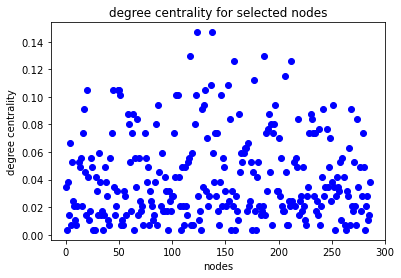

In [36]:
# plot the degree centrality
for i in range(g_nodes_number):
    plt.scatter(i,g_deg_c[i],c='b')
plt.xlabel("nodes")
plt.ylabel("degree centrality")
plt.title("degree centrality for selected nodes")
plt.show()

In [37]:
max_deg_c=max(g_deg_c)
max_deg_c

0.14685314685314685

In [38]:
for i in range(g_nodes_number):
    if g_deg_c[i]==max_deg_c:
        print(g_nodes[i])

RainshadowRunning
GlennTachiyama


The nodes above are influencial spraders.

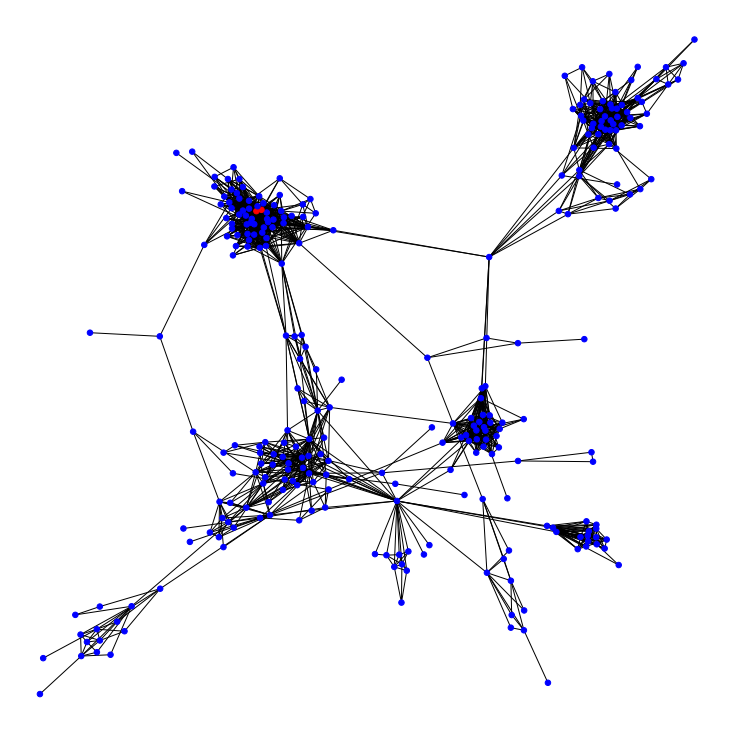

In [39]:
for i in range(g_nodes_number):
    a=g_nodes[i]
    g.nodes[a]['color'] ='b'
g.nodes['RainshadowRunning']['color'] ='r'
g.nodes['GlennTachiyama']['color'] ='r'
plt.figure(figsize=(10,10))
nx.draw(g, node_size=30, node_color = [g.nodes[v]['color'] for v in g.nodes()])
plt.show()

In [40]:
# compute the betweenness centrality for each nodes
bc=nx.betweenness_centrality(g)
g_bet_c=[bc[g_nodes[i]] for i in range(g_nodes_number)]
bc

{'ChristopherChan': 0.0001033274717485244,
 'ClarissaSimon': 0.0,
 'KatiWu': 2.3125023125023126e-05,
 'CarlaOwen': 5.5022967256570394e-05,
 'KevinDouglas': 0.00026635902541276453,
 'BenAldred': 0.0,
 'ColleenSchoonover': 0.07001353654262926,
 'KrystleFlerchinger': 0.008553269547012611,
 'JustinPierce': 0.0015315796014383567,
 'NaomiFishman': 0.006993006993006993,
 'TheresaNguyen': 0.0009193032067080792,
 'AmandaSmith': 0.005208696345980126,
 'EricChan': 8.33571886203465e-05,
 'DerekChan': 4.953136532083901e-05,
 'DonnieDrobny': 0.00010472702613973435,
 'JamesWallace': 0.00034245420333016944,
 'BenBlessing': 0.00058245092410808,
 'BekahWolf': 0.09503595312313004,
 'PatrickChan': 3.400108663266559e-05,
 'MelissaHolmes': 0.00016551388867978194,
 'CraigDickson': 0.005521374086475953,
 "NikkiO'Brien": 2.3656734835404628e-05,
 'JulieBergstrom': 0.0,
 'CarolinaMannMain': 0.025423743898980763,
 'JudyW.Kroone': 0.03099980915770377,
 'JustinKim': 0.0003883640569746283,
 'AprilShunnWilliams': 0.0

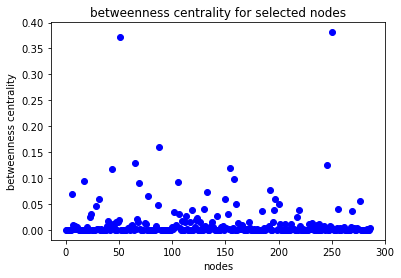

In [41]:
# plot the betweenness centrality
for i in range(g_nodes_number):
    plt.scatter(i,g_bet_c[i],c='b')
plt.xlabel("nodes")
plt.ylabel("betweenness centrality")
plt.title("betweenness centrality for selected nodes")
plt.show()

In [42]:
max_bet_c=max(g_bet_c)
max_bet_c

0.38130102670432275

In [43]:
for i in range(g_nodes_number):
    if g_bet_c[i]==max_bet_c:
        g_bet_c[i]=0
        print(g_nodes[i])

Erin'Davis'Thekkedom


In [44]:
max_bet_c=max(g_bet_c)
max_bet_c

0.37122110682716136

In [45]:
for i in range(g_nodes_number):
    if g_bet_c[i]==max_bet_c:
        print(g_nodes[i])

CatBuckley


The node above is a influencial spraders.

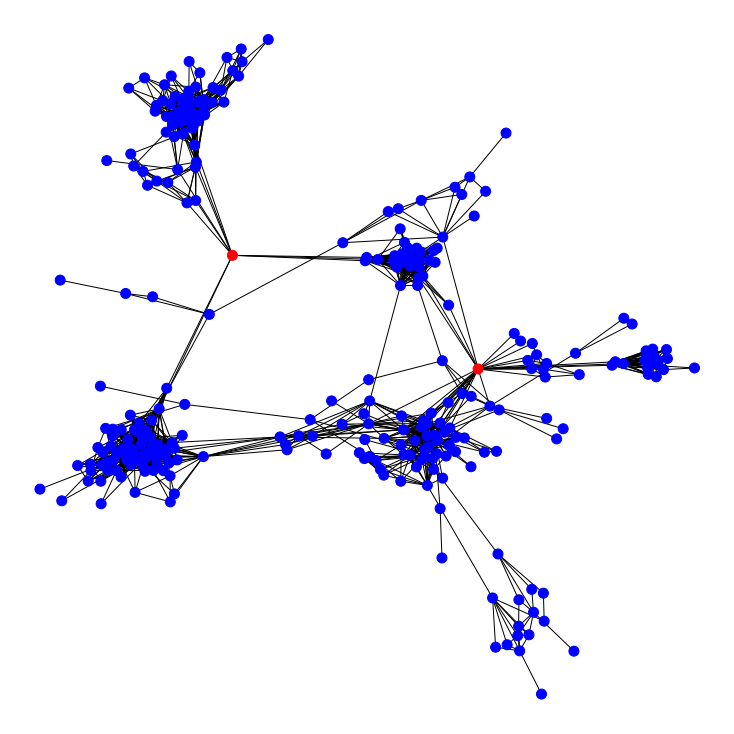

In [46]:
for i in range(g_nodes_number):
    a=g_nodes[i]
    g.nodes[a]['color'] ='b'
g.nodes["Erin'Davis'Thekkedom"]['color'] ='r'
g.nodes["CatBuckley"]['color'] ='r'
plt.figure(figsize=(10,10))
nx.draw(g, node_size=100, node_color = [g.nodes[v]['color'] for v in g.nodes()])
plt.show()

In [47]:
# compute the closeness centrality for each nodes
cc=nx.closeness_centrality(g)
g_clo_c=[cc[g_nodes[i]] for i in range(g_nodes_number)]
cc

{'ChristopherChan': 0.19416157501697218,
 'ClarissaSimon': 0.2330888345558272,
 'KatiWu': 0.19429347826086957,
 'CarlaOwen': 0.22448979591836735,
 'KevinDouglas': 0.21216617210682492,
 'BenAldred': 0.233278955954323,
 'ColleenSchoonover': 0.23793677204658903,
 'KrystleFlerchinger': 0.2288,
 'JustinPierce': 0.19363574813811782,
 'NaomiFishman': 0.1868060091443501,
 'TheresaNguyen': 0.17105263157894737,
 'AmandaSmith': 0.22861710631494805,
 'EricChan': 0.19482288828337874,
 'DerekChan': 0.19469026548672566,
 'DonnieDrobny': 0.25021872265966755,
 'JamesWallace': 0.15950920245398773,
 'BenBlessing': 0.23045930701047543,
 'BekahWolf': 0.2828882294757666,
 'PatrickChan': 0.1945578231292517,
 'MelissaHolmes': 0.16863207547169812,
 'CraigDickson': 0.25309734513274335,
 "NikkiO'Brien": 0.23027375201288244,
 'JulieBergstrom': 0.15888888888888889,
 'CarolinaMannMain': 0.22953451043338685,
 'JudyW.Kroone': 0.2387312186978297,
 'JustinKim': 0.17291414752116083,
 'AprilShunnWilliams': 0.178304239401

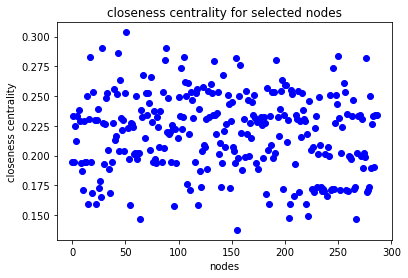

In [48]:
# plot the closeness centrality
for i in range(g_nodes_number):
    plt.scatter(i,g_clo_c[i],c='b')
plt.xlabel("nodes")
plt.ylabel("closeness centrality")
plt.title("closeness centrality for selected nodes")
plt.show()

In [49]:
max_clo_c=max(g_clo_c)
max_clo_c

0.3036093418259023

In [50]:
for i in range(g_nodes_number):
    if g_clo_c[i]==max_clo_c:
        print(g_nodes[i])

CatBuckley


The node above is a influencial spraders.

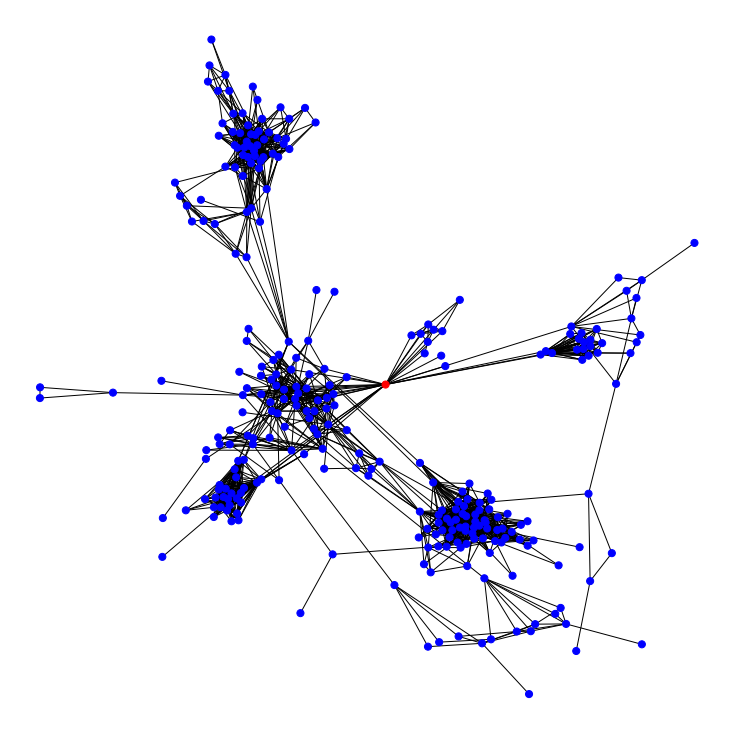

In [51]:
for i in range(g_nodes_number):
    a=g_nodes[i]
    g.nodes[a]['color'] ='b'
g.nodes["CatBuckley"]['color'] ='r'
plt.figure(figsize=(10,10))
nx.draw(g, node_size=50, node_color = [g.nodes[v]['color'] for v in g.nodes()])
plt.show()

In [52]:
# compute the eigenvector centrality for each nodes
ec=nx.eigenvector_centrality(g)
g_eig_c=[ec[g_nodes[i]] for i in range(g_nodes_number)]
ec

{'ChristopherChan': 3.377165215747164e-06,
 'ClarissaSimon': 1.4821952542000393e-05,
 'KatiWu': 3.0077927138749825e-06,
 'CarlaOwen': 0.014126312247127635,
 'KevinDouglas': 0.13621261895133913,
 'BenAldred': 1.5586306028247766e-05,
 'ColleenSchoonover': 0.00048113686444453853,
 'KrystleFlerchinger': 0.0003973803771249656,
 'JustinPierce': 2.9417471477522618e-05,
 'NaomiFishman': 0.0002436574036193433,
 'TheresaNguyen': 1.5752759582221795e-07,
 'AmandaSmith': 0.0003957896447858855,
 'EricChan': 4.1719298552789875e-06,
 'DerekChan': 4.073930999587955e-06,
 'DonnieDrobny': 0.0001378263014104761,
 'JamesWallace': 2.6203248885153614e-07,
 'BenBlessing': 0.14379793175435998,
 'BekahWolf': 0.0001694213360564426,
 'PatrickChan': 3.935538168481611e-06,
 'MelissaHolmes': 1.0954083062112036e-05,
 'CraigDickson': 0.19205620586440345,
 "NikkiO'Brien": 7.655712898815449e-05,
 'JulieBergstrom': 2.3304824435765585e-07,
 'CarolinaMannMain': 0.00023544662526712946,
 'JudyW.Kroone': 1.8386522710446087e-0

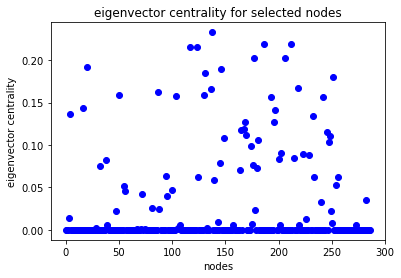

In [53]:
# plot the eigenvector centrality
for i in range(g_nodes_number):
    plt.scatter(i,g_eig_c[i],c='b')
plt.xlabel("nodes")
plt.ylabel("eigenvector centrality")
plt.title("eigenvector centrality for selected nodes")
plt.show()

In [54]:
max_eig_c=max(g_eig_c)
max_eig_c

0.23291497720132115

In [55]:
for i in range(g_nodes_number):
    if g_eig_c[i]==max_eig_c:
        print(g_nodes[i])

GlennTachiyama


The node above is a influencial spraders.

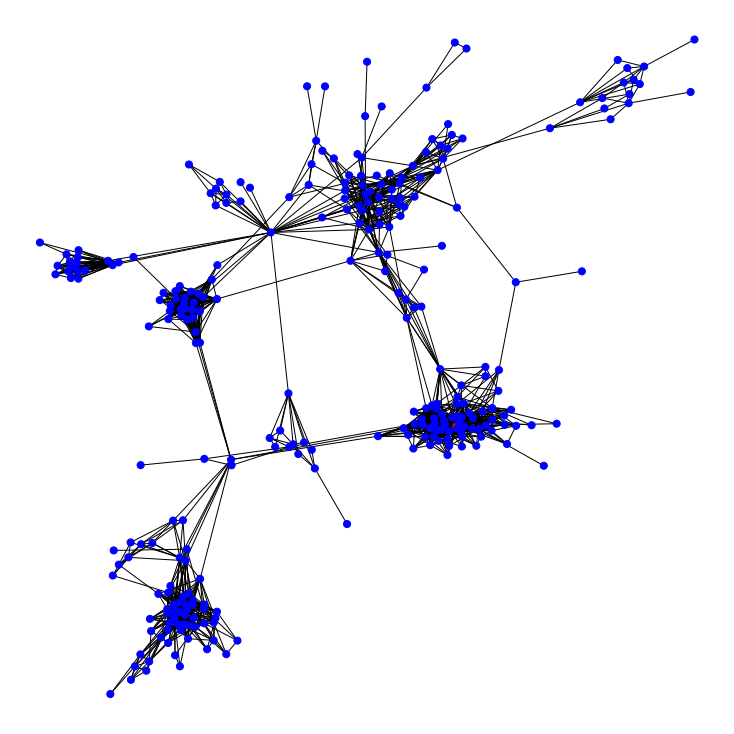

In [56]:
for i in range(g_nodes_number):
    a=g_nodes[i]
    g.nodes[a]['color'] ='b'
g.nodes["GlennTachiyama"]['color'] ='r'
plt.figure(figsize=(10,10))
nx.draw(g, node_size=50, node_color = [g.nodes[v]['color'] for v in g.nodes()])
plt.show()

In [57]:
# find the communities using the greedy modularity maximization
import networkx.algorithms.community as nxcom

g_greedy = sorted(nxcom.greedy_modularity_communities(g), key=len, reverse=True)
g_greedy_num=len(g_greedy)
g_greedy_num

8

In [58]:
# build a set of colors
col=['red','blue','green','yellow','orange','pink','brown','gray','lightsalmon','lightsalmon','purple','violet','silver','rosybrown','lightcoral','peachpuff','gold','olive','greenyellow','palegreen','darkgreen','aquamarine','turquoise','paleturquoise','darkcyan','cyan','deepskyblue','steelblue','plum','magenta','orchid','deeppink','hotpink','wheat','sienna','slateblue','azure','chocolate','sandybrown','gainsboro','forestgreen','lavender','blueviolet','tomato']

In [59]:
g_facebook_greedy = [c for c in nxcom.greedy_modularity_communities(g)]

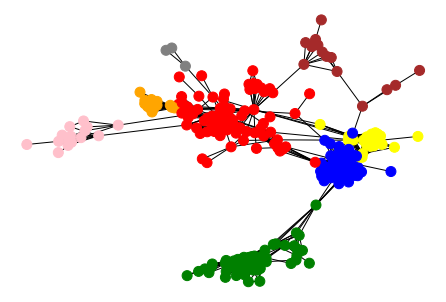

In [60]:
# draw the resulting graph 
nodes0 = g_facebook_greedy[0]
nodes1 = g_facebook_greedy[1]
nodes2 = g_facebook_greedy[2]
nodes3 = g_facebook_greedy[3]
nodes4 = g_facebook_greedy[4]
nodes5 = g_facebook_greedy[5]
nodes6 = g_facebook_greedy[6]
nodes7 = g_facebook_greedy[7]

for v in g.nodes():
    if v in nodes0:
        g.nodes[v]['color'] = col[0]
    elif v in nodes1:
        g.nodes[v]['color'] = col[1]
    elif v in nodes2:
        g.nodes[v]['color'] = col[2]
    elif v in nodes3:
        g.nodes[v]['color'] = col[3]
    elif v in nodes4:
        g.nodes[v]['color'] = col[4]
    elif v in nodes5:
        g.nodes[v]['color'] = col[5]
    elif v in nodes6:
        g.nodes[v]['color'] = col[6]
    else:
        g.nodes[v]['color'] = col[7]
nx.draw(g,node_size=100, node_color = [g.nodes[v]['color'] for v in g.nodes()])
plt.show()

In [61]:
for i in range(g_greedy_num):
    print(g_greedy[i])

frozenset({'LauraStahlyDavis', 'ElizabethRollerson', 'KateLauberndsHorspool', 'AaronBuckley', 'TracyMeese', 'GiovanniBencomo', 'AngieBurr', 'NedraHowsdenRezinas', 'RichmondFontaine', 'LuciaLongoria', 'DawnJones', 'KristenBroyer', 'AnnieBencomo', 'ChandaGandhi', 'MandyWilson', 'ClarissaSimon', 'SusanKelley', 'ElizabethCole', 'JasonPost', 'MeganBrown', 'DavidDvorak', 'SusanKucera', 'SherSinda', 'BenAldred', 'JohnnyBuell', 'AmaraZee', 'KeelyPhillips', 'KristenBolkaBackeberg', 'DavidJ.Dranchak', "Helane'Wahbeh", 'DavidAsaro', 'ChristopherJ.Barker', 'TinekeMalus', 'BrianBehrens', 'RickRezinas', 'BrentHarris', 'CarolineKobin', 'DaveCain', 'AnnWallace', 'AliJessie', 'HollyFraser-Witt', 'NicciLambert', 'MelissaHovis', 'MikeSmith', 'CherylSturgis', 'DaveHorspool', 'LeaBuckleyDavis', 'MattDavis', 'JoleneKawecki', 'OrnaIzakson', 'YuliBuckley', "ThomasO'Leary", 'DebbieGinzburg', 'JohnStevens', 'SarahDyste', 'ElizabethBuckley', 'AmyHarris', 'YuminBuckley', 'RogerChou', 'JulieHonse', 'ConnBuckley', 

In [62]:
nxcom.modularity(g,g_greedy)

0.746141148671047

In [63]:
# find the communities using the label propagation algorithm
g_label = sorted(nxcom.label_propagation_communities(g), key=len, reverse=True)
g_facebook_label = [c for c in nxcom.label_propagation_communities(g)]
g_facebook_label_num=len(g_facebook_label)
g_facebook_label_num

17

In [64]:
for i in range(g_facebook_label_num):
    print(g_facebook_label[i])

{'TinekeMalus', 'AngieBurr', 'MattMoore', "Helane'Wahbeh", 'KristenBroyer', 'MeganBrown', 'StacyBenjamin', 'RichmondFontaine', 'JoleneKawecki'}
{'KimPeterson', 'NatalieJacuzzi', 'MirandaPappas', 'DianeDoctor', 'TheresaNguyen', 'NancyLee'}
{'NaomiFishman', 'MelissaPowell', 'FrancesFavela', 'NicoleBusto'}
{'CarolinaMannMain', 'EricMain', 'AllisonCox', 'MichaelCox', 'CoryEddy', 'RenieraWardEddy', 'ElissaKevrekian', 'SkyeMacalester', 'LindaJones', 'DanLankow'}
{'AprilShunnWilliams', 'ElizabethCole'}
{'DaveHorspool', 'KristenBolkaBackeberg', 'KateLauberndsHorspool', 'GaryBlessington', 'AnnieBencomo', 'BrianBehrens', 'HollyFraser-Witt', 'GiovanniBencomo', 'JulieHonse', 'CarolineKobin', 'MandyWilson'}
{'ElizabethRollerson', 'AliJessie', 'NicciLambert', 'SandyBacharach', 'DawnJones', 'KarinnaJones'}
{'OrnaIzakson', 'AvivaGronerBrown'}
{'AnthonyPetrarca', 'KatieLessner', 'AnnErpino'}
{'MelissaHolmes', 'KellieSwansonKutkey', 'JustinPierce', 'AdamSchmierer'}
{'DjBlastSanchez', 'NickHartley', 'Dan

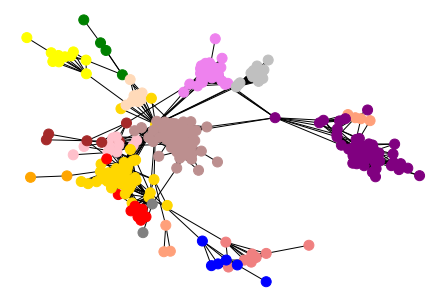

In [65]:
# draw the resulting graph 
nodes0 = g_facebook_label[0]
nodes1 = g_facebook_label[1]
nodes2 = g_facebook_label[2]
nodes3 = g_facebook_label[3]
nodes4 = g_facebook_label[4]
nodes5 = g_facebook_label[5]
nodes6 = g_facebook_label[6]
nodes7 = g_facebook_label[7]
nodes8 = g_facebook_label[8]
nodes9 = g_facebook_label[9]
nodes10 = g_facebook_label[10]
nodes11 = g_facebook_label[11]
nodes12 = g_facebook_label[12]
nodes13 = g_facebook_label[13]
nodes14 = g_facebook_label[14]
nodes15 = g_facebook_label[15]
nodes16 = g_facebook_label[16]

for v in g.nodes():
    if v in nodes0:
        g.nodes[v]['color'] = col[0]
    elif v in nodes1:
        g.nodes[v]['color'] = col[1]
    elif v in nodes2:
        g.nodes[v]['color'] = col[2]
    elif v in nodes3:
        g.nodes[v]['color'] = col[3]
    elif v in nodes4:
        g.nodes[v]['color'] = col[4]
    elif v in nodes5:
        g.nodes[v]['color'] = col[5]
    elif v in nodes6:
        g.nodes[v]['color'] = col[6]
    elif v in nodes7:
        g.nodes[v]['color'] = col[7]
    elif v in nodes8:
        g.nodes[v]['color'] = col[8]
    elif v in nodes9:
        g.nodes[v]['color'] = col[9]
    elif v in nodes10:
        g.nodes[v]['color'] = col[10]
    elif v in nodes11:
        g.nodes[v]['color'] = col[11]
    elif v in nodes12:
        g.nodes[v]['color'] = col[12]
    elif v in nodes13:
        g.nodes[v]['color'] = col[13]
    elif v in nodes14:
        g.nodes[v]['color'] = col[14]
    elif v in nodes15:
        g.nodes[v]['color'] = col[15]
    else:
        g.nodes[v]['color'] = col[16]
nx.draw(g,node_size=100,node_color = [g.nodes[v]['color'] for v in g.nodes()])
plt.show()

In [66]:
nxcom.modularity(g,g_label)

0.7320789806968186

Because the modularity Q of greedy modularity is greater than label propagation algorithm, greedy modularity get better result of finding communities.

In [67]:
# get the degrees
g_deg = g.degree()
g_degree = [g_deg[i] for i in g.nodes()]
g_max=max(g_degree)
g_min=min(g_degree)
print("max degree",g_max)
print("min degree",g_min)

max degree 42
min degree 1


In [68]:
# compute the degree distribution
p_list = []
k_list = []
for i in range(g_min,g_max+1):
    k_list.append(i)
    p = g_degree.count(i) / g_nodes_number
    p_list.append(p)
    print(i,p)
#print(sum(p_list)) 
p_max = max(p_list)
for i in range(len(p_list)):
    if(p_list[i]== p_max):
          k_max = i     
print(k_max, p_max)  

1 0.05226480836236934
2 0.06968641114982578
3 0.03484320557491289
4 0.05226480836236934
5 0.06968641114982578
6 0.08710801393728224
7 0.03832752613240418
8 0.059233449477351915
9 0.04878048780487805
10 0.03484320557491289
11 0.0313588850174216
12 0.0313588850174216
13 0.020905923344947737
14 0.041811846689895474
15 0.03484320557491289
16 0.03832752613240418
17 0.020905923344947737
18 0.010452961672473868
19 0.006968641114982578
20 0.010452961672473868
21 0.04529616724738676
22 0.010452961672473868
23 0.017421602787456445
24 0.017421602787456445
25 0.017421602787456445
26 0.013937282229965157
27 0.013937282229965157
28 0.0
29 0.017421602787456445
30 0.017421602787456445
31 0.006968641114982578
32 0.003484320557491289
33 0.003484320557491289
34 0.0
35 0.0
36 0.006968641114982578
37 0.006968641114982578
38 0.0
39 0.0
40 0.0
41 0.0
42 0.006968641114982578
5 0.08710801393728224


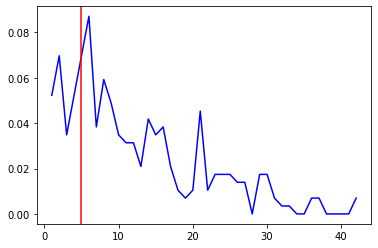

In [69]:
plt.plot(k_list,p_list,color = 'blue')
plt.axvline(x = k_max,c="red")
plt.show()

### Directed graph

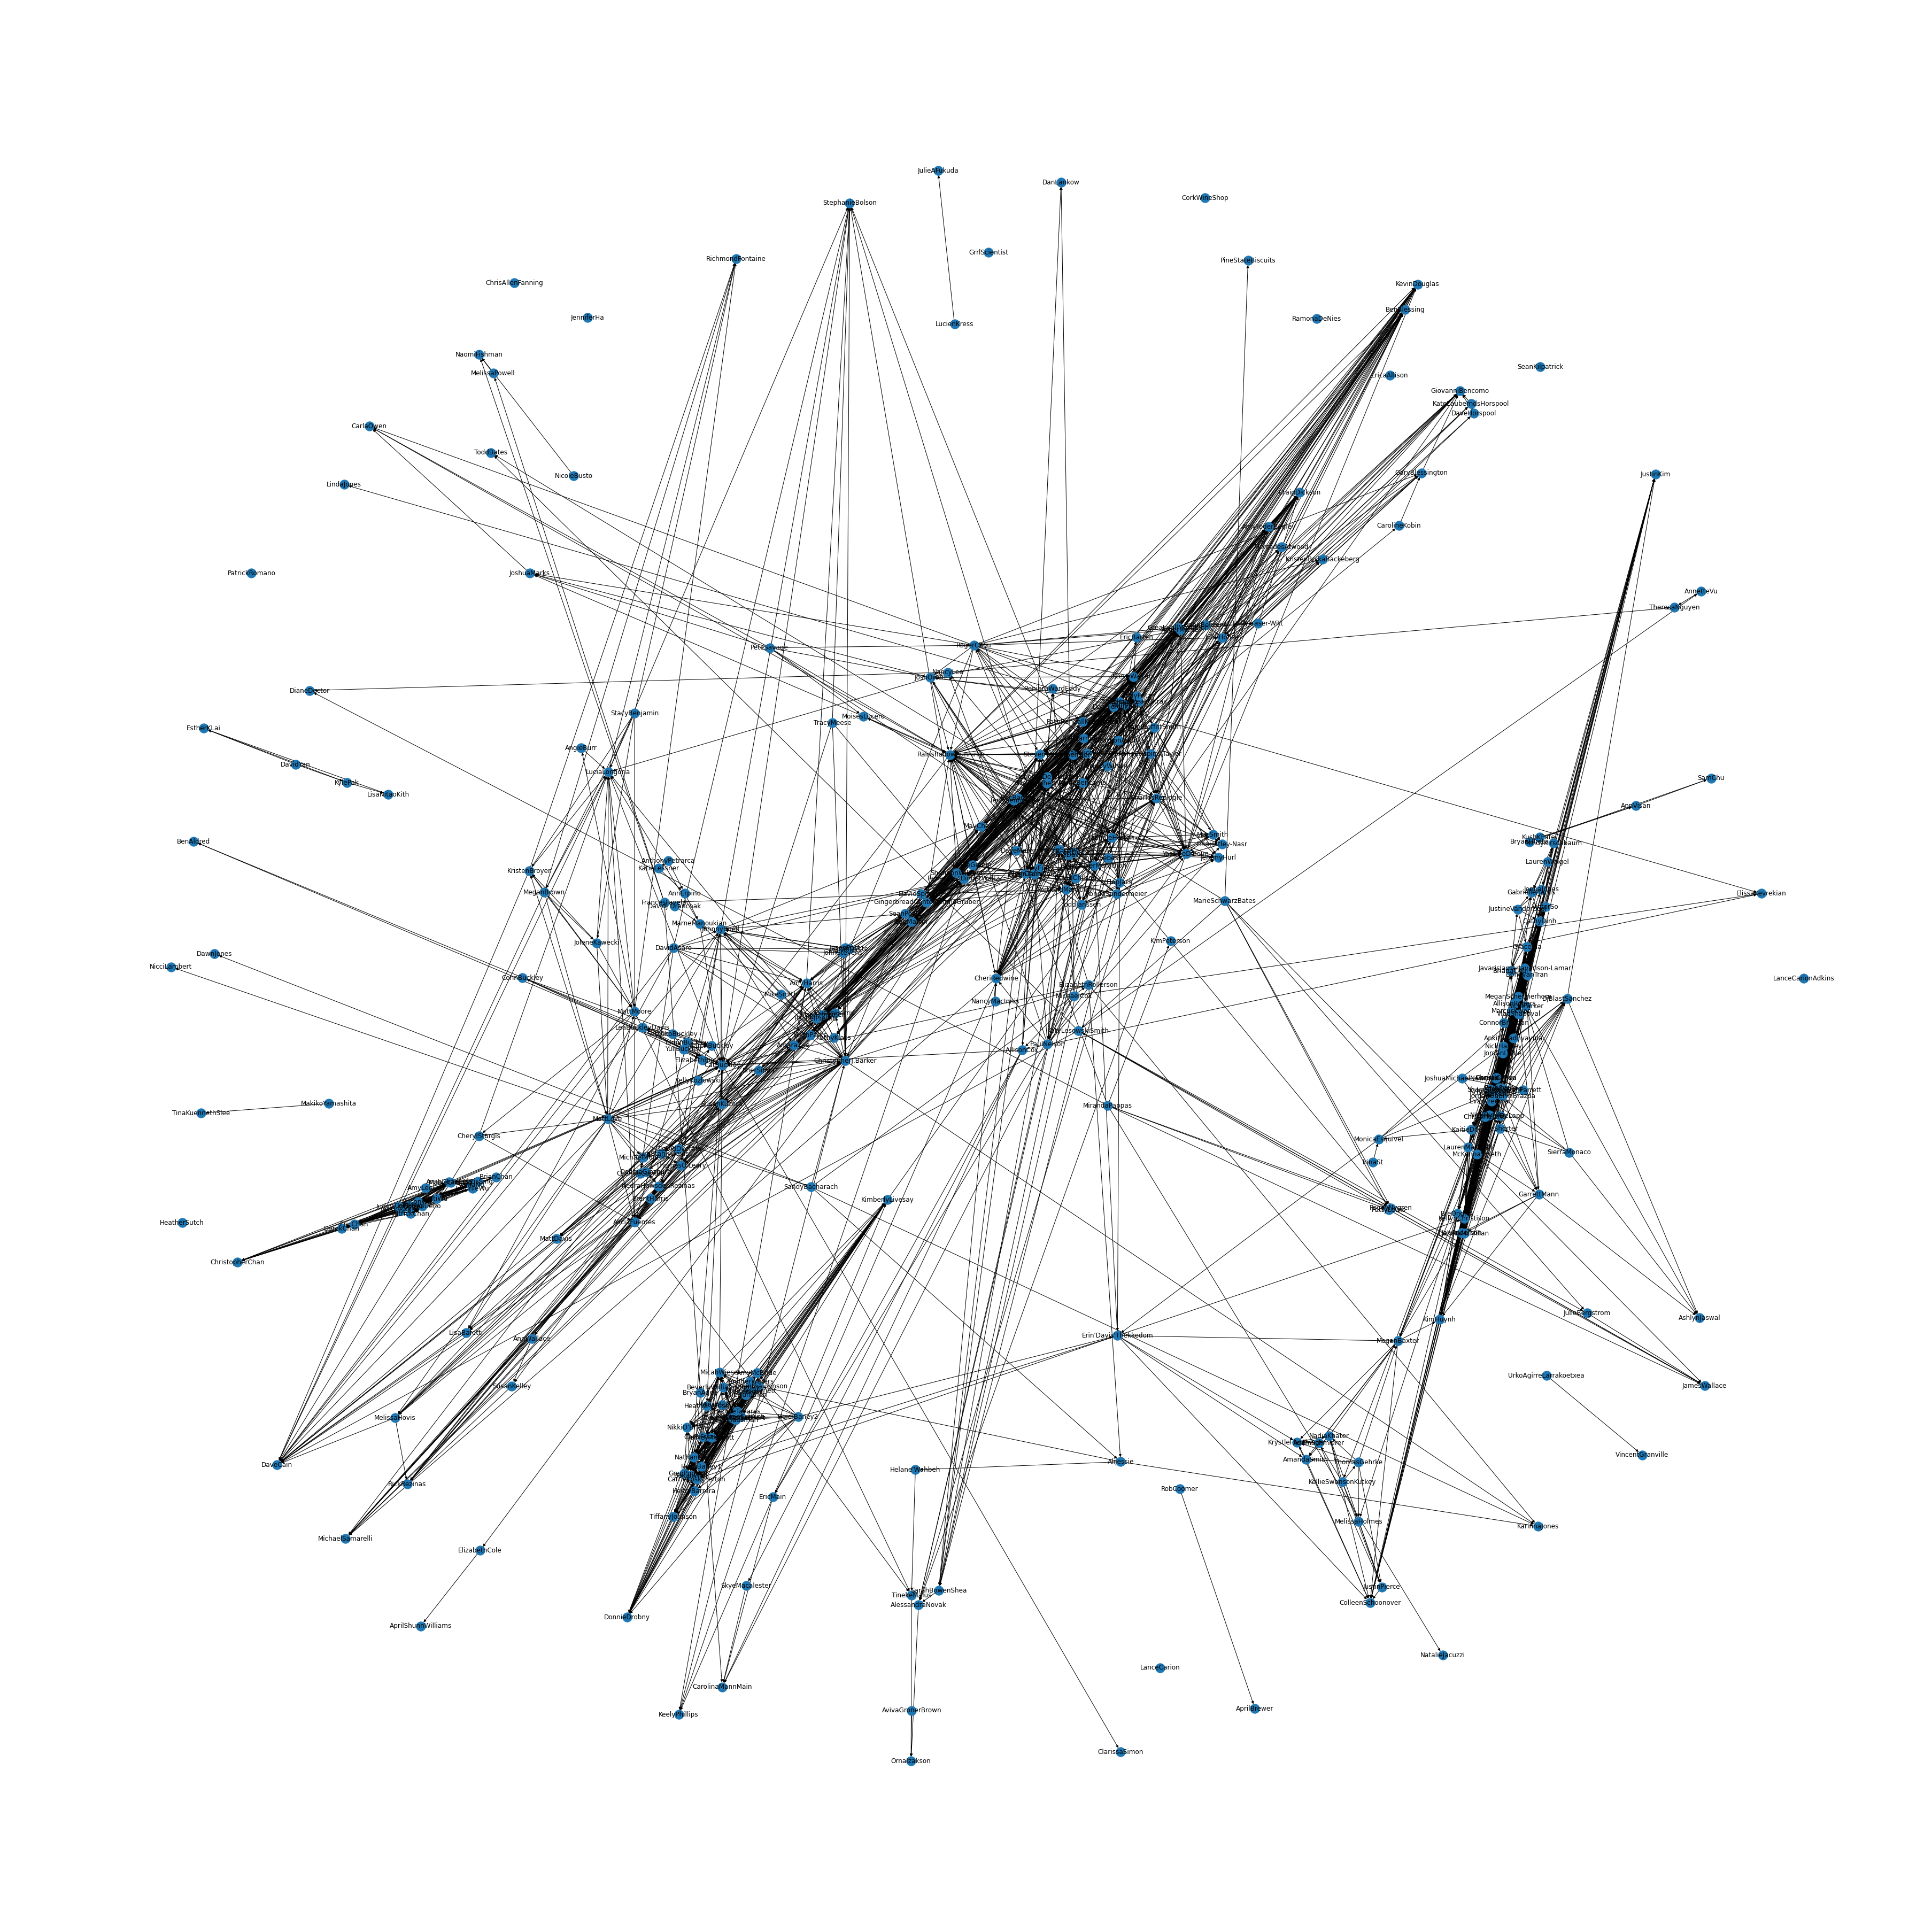

In [70]:
g  = nx.read_gml("PersonalFriendNetwork2.gml")
nx.write_adjlist(g, "PersonalFriendNetwork2.adjlist")
g1 =nx.read_adjlist("PersonalFriendNetwork2.adjlist", create_using=nx.DiGraph())
G = nx.DiGraph.reverse(g1)
plt.figure(figsize=(50,50))
nx.draw(G, with_labels=True)
plt.show()

In [71]:
G_nodes = G.nodes()
#print(G_nodes)
key_value = list(G_nodes.keys())
print(key_value)

['ChristopherChan', 'KatiWu', 'EricChan', 'DerekChan', 'JudyW.Kroone', 'JasonWu', 'JocelynChan', 'CarterNg', 'AnnaChanLiao', 'AmyLeeLim', 'MableCheung', 'ClarissaSimon', 'CatBuckley', 'PatrickChan', 'JeannieWu', 'VaniaNg', 'ChrisSing', 'CarlaOwen', 'RainshadowRunning', 'JoshuaMarks', 'RogerChou', 'PeteSavage', 'KevinDouglas', 'BenBlessing', 'CraigDickson', 'YassineDiboun', 'SteveWalters', 'StevenYee', 'CharlesReplogle', 'GlennTachiyama', 'MattHagen', 'RogerMichel', 'PattiRandallKrebsbach', 'EricBarnes', 'TerrySentinella', 'AlvinCrain', 'PamProffittSmith', 'VanPhan', 'GreatwallMarathon', 'BillBarmore', 'CapitolPeakUltras', 'BenAldred', 'ConnBuckley', 'ColleenSchoonover', 'KrystleFlerchinger', 'JustinPierce', 'AmandaSmith', 'AnkitUpadhyayula', 'KimHuynh', 'DakotaMcMillan', 'JonAnderson', 'KellynChristison', 'MeganBaxter', 'ChristinaHsu', 'BreOngley', 'DanielCohen', 'NadiaKhater', "Erin'Davis'Thekkedom", 'McKennaSpieth', 'AdamSchmierer', 'ThomasGehrke', 'MelissaHolmes', 'KellieSwansonKutk

In [72]:
G_nodes_number = G.number_of_nodes()
G_nodes_number

314

In [73]:
# compute the clustering coefficient for each nodes
G_clustering = nx.clustering(G)
G_clustering

{'ChristopherChan': 0.3888888888888889,
 'KatiWu': 0.43636363636363634,
 'EricChan': 0.38571428571428573,
 'DerekChan': 0.41208791208791207,
 'JudyW.Kroone': 0.3458333333333333,
 'JasonWu': 0.4065934065934066,
 'JocelynChan': 0.45454545454545453,
 'CarterNg': 0.38571428571428573,
 'AnnaChanLiao': 0.3088235294117647,
 'AmyLeeLim': 0.5,
 'MableCheung': 0.37362637362637363,
 'ClarissaSimon': 0,
 'CatBuckley': 0.07019704433497537,
 'PatrickChan': 0.42948717948717946,
 'JeannieWu': 0.4727272727272727,
 'VaniaNg': 0.4393939393939394,
 'ChrisSing': 0.5,
 'CarlaOwen': 0.4166666666666667,
 'RainshadowRunning': 0.17015098722415795,
 'JoshuaMarks': 0.3,
 'RogerChou': 0.15,
 'PeteSavage': 0.2619047619047619,
 'KevinDouglas': 0.347953216374269,
 'BenBlessing': 0.30714285714285716,
 'CraigDickson': 0.26091954022988506,
 'YassineDiboun': 0.21149425287356322,
 'SteveWalters': 0.21621621621621623,
 'StevenYee': 0.2597701149425287,
 'CharlesReplogle': 0.2129032258064516,
 'GlennTachiyama': 0.19454123112

In [74]:
nx.degree_assortativity_coefficient

<function networkx.algorithms.assortativity.correlation.degree_assortativity_coefficient(G, x='out', y='in', weight=None, nodes=None)>

In [75]:
nx.degree_centrality(G)

{'ChristopherChan': 0.03194888178913738,
 'KatiWu': 0.03514376996805112,
 'EricChan': 0.04792332268370607,
 'DerekChan': 0.04472843450479233,
 'JudyW.Kroone': 0.051118210862619806,
 'JasonWu': 0.04472843450479233,
 'JocelynChan': 0.03514376996805112,
 'CarterNg': 0.04792332268370607,
 'AnnaChanLiao': 0.054313099041533544,
 'AmyLeeLim': 0.006389776357827476,
 'MableCheung': 0.04472843450479233,
 'ClarissaSimon': 0.003194888178913738,
 'CatBuckley': 0.0926517571884984,
 'PatrickChan': 0.04153354632587859,
 'JeannieWu': 0.03514376996805112,
 'VaniaNg': 0.038338658146964855,
 'ChrisSing': 0.022364217252396165,
 'CarlaOwen': 0.012779552715654952,
 'RainshadowRunning': 0.134185303514377,
 'JoshuaMarks': 0.01597444089456869,
 'RogerChou': 0.06389776357827476,
 'PeteSavage': 0.022364217252396165,
 'KevinDouglas': 0.06070287539936102,
 'BenBlessing': 0.0670926517571885,
 'CraigDickson': 0.09584664536741214,
 'YassineDiboun': 0.09584664536741214,
 'SteveWalters': 0.1182108626198083,
 'StevenYee'

In [76]:
value = list((nx.degree_centrality(G)).values())
key = list((nx.degree_centrality(G)).keys())
print(max(value))

for i in range(len(value)):
    if list(value)[i] == max(value):
        print(i)
        print(key[i])
print(value[12])  
print(value[18])     
print(value[29])
print(value[40])
print(value[150])       

0.134185303514377
18
RainshadowRunning
29
GlennTachiyama
0.0926517571884984
0.134185303514377
0.134185303514377
0.08626198083067092
0.038338658146964855


In [77]:
# compute the betweenness centrality
nx.betweenness_centrality(G)

{'ChristopherChan': 0.0,
 'KatiWu': 9.728024903743753e-06,
 'EricChan': 2.059383049798385e-05,
 'DerekChan': 1.803382394436707e-05,
 'JudyW.Kroone': 0.0050928201487306915,
 'JasonWu': 2.059383049798385e-05,
 'JocelynChan': 6.826684142978072e-06,
 'CarterNg': 3.356453036964219e-05,
 'AnnaChanLiao': 0.00029980521194578703,
 'AmyLeeLim': 0.0,
 'MableCheung': 0.0,
 'ClarissaSimon': 0.0,
 'CatBuckley': 0.010989961848588043,
 'PatrickChan': 6.599128004878803e-06,
 'JeannieWu': 2.8444517262408636e-06,
 'VaniaNg': 2.844451726240864e-05,
 'ChrisSing': 0.0,
 'CarlaOwen': 0.0,
 'RainshadowRunning': 0.0017466734192846903,
 'JoshuaMarks': 1.0240026214467109e-05,
 'RogerChou': 0.008099283689877198,
 'PeteSavage': 0.0,
 'KevinDouglas': 0.0,
 'BenBlessing': 2.538913281724783e-05,
 'CraigDickson': 0.0003972564974961142,
 'YassineDiboun': 0.0008525475678031587,
 'SteveWalters': 0.0009115865361257347,
 'StevenYee': 0.0007030215320028541,
 'CharlesReplogle': 0.0007227505543560178,
 'GlennTachiyama': 0.001

In [78]:
value = list((nx.betweenness_centrality(G)).values())
key = list((nx.betweenness_centrality(G)).keys())
print(max(value))

for i in range(len(value)):
    if list(value)[i] == max(value):
        print(i)
        print(key[i])
print(value[12])  
print(value[18])     
print(value[29])
print(value[40])
print(value[150])          

0.010989961848588043
12
CatBuckley
0.010989961848588043
0.0017466734192846903
0.001245165675195037
0.0
0.0


In [79]:
value = (nx.betweenness_centrality(G)).values()
max(list(value))

0.010989961848588043

In [80]:
# compute the closeness centrality
nx.closeness_centrality(G)

{'ChristopherChan': 0.08932853312079109,
 'KatiWu': 0.08815449421053703,
 'EricChan': 0.08754404969216635,
 'DerekChan': 0.0860014534684419,
 'JudyW.Kroone': 0.10620370045290173,
 'JasonWu': 0.026624068157614485,
 'JocelynChan': 0.017394391196308128,
 'CarterNg': 0.010223642172523962,
 'AnnaChanLiao': 0.009584664536741214,
 'AmyLeeLim': 0.0,
 'MableCheung': 0.0,
 'ClarissaSimon': 0.09363140522125925,
 'CatBuckley': 0.12833828808269704,
 'PatrickChan': 0.08465423065031434,
 'JeannieWu': 0.01858844031367993,
 'VaniaNg': 0.01437699680511182,
 'ChrisSing': 0.009984025559105431,
 'CarlaOwen': 0.07006412118233205,
 'RainshadowRunning': 0.10237685637046659,
 'JoshuaMarks': 0.03538953059719833,
 'RogerChou': 0.02958553984857105,
 'PeteSavage': 0.0,
 'KevinDouglas': 0.1075612353567625,
 'BenBlessing': 0.09287639776357828,
 'CraigDickson': 0.12575289373068665,
 'YassineDiboun': 0.10655891749671115,
 'SteveWalters': 0.10485042114435086,
 'StevenYee': 0.08497043029025898,
 'CharlesReplogle': 0.074

In [81]:
value = list((nx.closeness_centrality(G)).values())
key = list((nx.closeness_centrality(G)).keys())
print(max(value))

for i in range(len(value)):
    if list(value)[i] == max(value):
        print(i)
        print(key[i])
print(value[12])  
print(value[18])     
print(value[29])
print(value[40])
print(value[150])     

0.13359045946905374
150
GiovanniBencomo
0.12833828808269704
0.10237685637046659
0.07915077810986293
0.0
0.13359045946905374


In [82]:
nx.degree_assortativity_coefficient(G)

0.07837078452523856

In [83]:
G_indegree = G.in_degree
G_in_degree = [G_indegree[i] for i in G.nodes()]
G_in_max=max(G_in_degree)
G_in_min=min(G_in_degree)

#print(G_nodes)
print("max in-degree",G_in_max)
print("min in-degree",G_in_min)

for i in range(len(G_in_degree)):
    if G_in_degree[i] == G_in_max:
        node_max_in_degree = i
        print(i)
        print(key_value[i])
        
print("the in-degree of closeness:",G_in_degree[150])        
print("the in-degree of betweenness:",G_in_degree[12])  
print("the in-degree of degree-centrality:",G_in_degree[18])  
print("the in-degree of degree-centrality:",G_in_degree[29])  
print(G_in_degree[40])
#print(G_in_degree[233])

max in-degree 32
min in-degree 0
18
RainshadowRunning
the in-degree of closeness: 12
the in-degree of betweenness: 23
the in-degree of degree-centrality: 32
the in-degree of degree-centrality: 28
0


In [84]:
p_in_list = [] #p(k-in)
k_in_list = [] #k-in
for i in range(G_in_min,G_in_max+1):
    k_in_list.append(i)
    p = G_in_degree.count(i) / G_nodes_number
    p_in_list.append(p)
    print(i,p)
#print(sum(p_in_list))      
p_in_max = max(p_in_list)
for i in range(len(p_in_list)):
    if(p_in_list[i]== p_in_max):
          k_in_max = i     
print(k_in_max, p_in_max)  

0 0.18152866242038215
1 0.1592356687898089
2 0.09872611464968153
3 0.08280254777070063
4 0.0732484076433121
5 0.0732484076433121
6 0.04777070063694268
7 0.028662420382165606
8 0.025477707006369428
9 0.028662420382165606
10 0.03503184713375796
11 0.025477707006369428
12 0.01910828025477707
13 0.006369426751592357
14 0.012738853503184714
15 0.0031847133757961785
16 0.009554140127388535
17 0.009554140127388535
18 0.01592356687898089
19 0.012738853503184714
20 0.009554140127388535
21 0.0
22 0.0031847133757961785
23 0.009554140127388535
24 0.0
25 0.006369426751592357
26 0.0031847133757961785
27 0.0
28 0.009554140127388535
29 0.0031847133757961785
30 0.0031847133757961785
31 0.0
32 0.0031847133757961785
0 0.18152866242038215


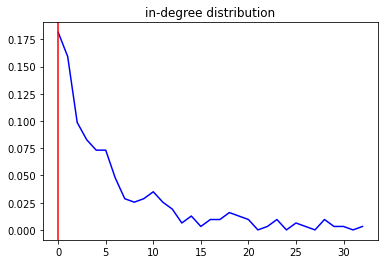

<Figure size 432x288 with 0 Axes>

In [85]:
plt.plot(k_in_list,p_in_list,color = 'blue')
plt.axvline(x = k_in_max,c="red")
plt.title("in-degree distribution")
plt.show()
plt.savefig('in-degree distribution.png')

In [86]:
degree_in_sum = np.sum(G_in_degree)

degree_in_PA_list = []
for i in range(len(G_in_degree)):
    pa = G_in_degree[i]/degree_in_sum
    degree_in_PA_list.append(pa)
    #name = G_node,index(i)
degree_in_PA_list 
print(degree_in_PA_list[12])  
print(degree_in_PA_list[18])     
print(degree_in_PA_list[29])
print(degree_in_PA_list[40])
print(degree_in_PA_list[150]) 

0.013302486986697512
0.01850780798149219
0.016194331983805668
0.0
0.006940427993059572


In [87]:
degree_in_pa_max = max(degree_in_PA_list)
print(degree_in_pa_max)

for i in range(len(degree_in_PA_list)):
    if degree_in_PA_list[i] == degree_in_pa_max :
        node_in_pa_max = i
        
print(node_in_pa_max)        
print("the max in perference node:", key_value[node_in_pa_max])        

0.01850780798149219
18
the max in perference node: RainshadowRunning


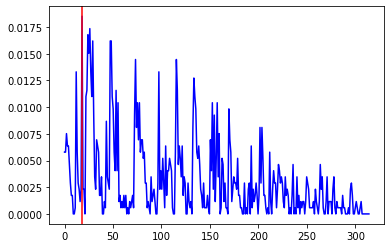

In [88]:
number = np.linspace(0,G_nodes_number, num = G_nodes_number)
plt.plot(number,degree_in_PA_list,color = 'blue')
plt.axvline(x = node_in_pa_max,c="red")
plt.show()

In [89]:
G_outdegree = G.out_degree
G_out_degree = [G_outdegree[i] for i in G.nodes()]
G_out_max=max(G_out_degree)
G_out_min=min(G_out_degree)
print("max out-degree",G_out_max)
print("min out-degree",G_out_min)

for i in range(len(G_out_degree)):
    if G_out_degree[i] == G_out_max:
        node_max_out_degree = i
        print(i)
        print(key_value[i])
        
print("the out-degree of closeness:",G_out_degree[150])        
print("the out-degree of betweenness:",G_out_degree[12])  
print("the out-degree of degree-centrality:",G_out_degree[18])  
print("the out-degree of degree-centrality:",G_out_degree[29])  

#print(G_out_degree[233])

max out-degree 27
min out-degree 0
40
CapitolPeakUltras
the out-degree of closeness: 0
the out-degree of betweenness: 6
the out-degree of degree-centrality: 10
the out-degree of degree-centrality: 14


In [90]:
p_out_list = [] #p(k-in)
k_out_list = [] #k-in
for i in range(G_out_min,G_out_max+1):
    k_out_list.append(i)
    p = G_out_degree.count(i) / G_nodes_number
    p_out_list.append(p)
    print(i,p)
p_out_max = max(p_out_list)
for i in range(len(p_out_list)):
    if(p_out_list[i]== p_out_max):
          k_out_max = i     
print(k_out_max, p_out_max)    
#print(sum(p_out_list))    

0 0.15605095541401273
1 0.17197452229299362
2 0.09235668789808917
3 0.06369426751592357
4 0.06687898089171974
5 0.054140127388535034
6 0.07643312101910828
7 0.06369426751592357
8 0.03184713375796178
9 0.01592356687898089
10 0.01910828025477707
11 0.022292993630573247
12 0.03821656050955414
13 0.009554140127388535
14 0.03503184713375796
15 0.012738853503184714
16 0.009554140127388535
17 0.009554140127388535
18 0.009554140127388535
19 0.0031847133757961785
20 0.006369426751592357
21 0.012738853503184714
22 0.0
23 0.006369426751592357
24 0.0031847133757961785
25 0.0
26 0.006369426751592357
27 0.0031847133757961785
1 0.17197452229299362


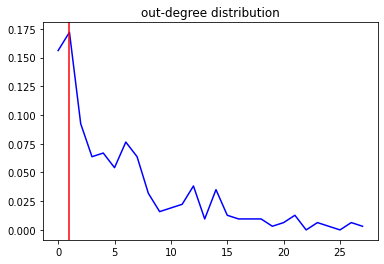

In [91]:
plt.plot(k_out_list,p_out_list,color = 'blue')
plt.axvline(x = k_out_max,c="red")
plt.title("out-degree distribution")
plt.show()

In [92]:
degree_out_sum = np.sum(G_out_degree)

degree_out_PA_list = []
for i in range(len(G_out_degree)):
    pa = G_out_degree[i]/degree_out_sum
    degree_out_PA_list.append(pa)
    #name = G_node,index(i)
degree_out_PA_list 
print(degree_out_PA_list[12])  
print(degree_out_PA_list[18])     
print(degree_out_PA_list[29])
print(degree_out_PA_list[40])
print(degree_out_PA_list[150]) 

0.003470213996529786
0.00578368999421631
0.008097165991902834
0.015615962984384037
0.0


In [93]:
degree_out_pa_max = max(degree_out_PA_list)
print(degree_out_pa_max)

for i in range(len(degree_out_PA_list)):
    if degree_out_PA_list[i] == degree_out_pa_max :
        node_out_pa_max = i
        
print(node_out_pa_max)
print("the max out perference node:", key_value[node_out_pa_max])        

0.015615962984384037
40
the max out perference node: CapitolPeakUltras


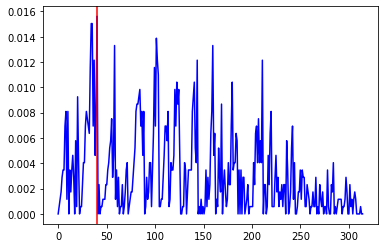

In [94]:
number = np.linspace(0,G_nodes_number, num = G_nodes_number)
plt.plot(number,degree_out_PA_list,color = 'blue')
plt.axvline(x = node_out_pa_max,c="red")
plt.show()

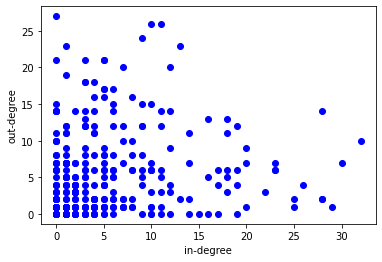

In [95]:
plt.scatter(G_in_degree,G_out_degree,color = 'blue')
plt.xlabel('in-degree')
plt.ylabel('out-degree')
plt.show()

In [96]:
# the degroot model
adj = nx.to_numpy_array(G)
len_row = adj.shape[0]
len_col = adj.shape[1]
print(adj)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [97]:
sum = 0
for i in range(len_row):
    sum = np.sum(adj[i,:])
    if sum == 0:
        adj[i,:] = np.zeros(len_col)
    else:   
        adj[i,:] = adj[i,:]/sum
print(adj)   

[[0.  0.  0.  ... 0.  0.  0. ]
 [1.  0.  0.  ... 0.  0.  0. ]
 [0.5 0.5 0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]


In [98]:
adj_rank = np.linalg.matrix_rank(adj)
adj_rank

230

In [99]:
I = np.identity(G_nodes_number)
b = np.ones(G_nodes_number)
ONE = np.ones((G_nodes_number,G_nodes_number))

In [100]:
x = np.linalg.solve((adj-I+ONE), b)
#x = np.linalg.solve(ONE, c)
#x = np.linalg.solve(adj, x)
#np.sum(x) = 1
print(max(x))
print(x)

0.0059137013009985424
[0.00094836 0.00189671 0.00237089 0.00268701 0.00318226 0.00334032
 0.00358092 0.00402436 0.00406833 0.0034567  0.00424931 0.00094836
 0.00274321 0.00326656 0.00373898 0.00395631 0.00389766 0.00094836
 0.00341408 0.00189671 0.0042095  0.00424929 0.00094836 0.00189671
 0.00189671 0.00284507 0.00331925 0.00387229 0.00360375 0.00369406
 0.00389268 0.00411691 0.00425619 0.00424162 0.0043651  0.00442719
 0.00454356 0.00450216 0.00448583 0.00467577 0.00478315 0.00094836
 0.00383558 0.00094836 0.00189671 0.00189671 0.00237089 0.00189671
 0.00237089 0.0029241  0.0029241  0.00346414 0.00312732 0.00333012
 0.00361463 0.00363453 0.00299635 0.00385397 0.00443305 0.00284507
 0.00347053 0.00284507 0.0037591  0.00094836 0.00189671 0.00189671
 0.00300211 0.00094836 0.00189671 0.0023624  0.00404603 0.00425983
 0.00094836 0.00189671 0.00237089 0.00268701 0.00268701 0.00324022
 0.00343215 0.003249   0.00388736 0.00387531 0.0039218  0.00409117
 0.00424458 0.00411688 0.00416216 0.0039

In [101]:
#1
p_ini = np.zeros(G_nodes_number)
for i in range(len(p_ini)):
    if i == 150:
        p_ini[i] = 1
#print(p_ini)       

In [102]:
p1 = np.dot(adj,p_ini)
#print(p1)
nonzero = 0
for i in range(len(p1)):
    if p1[i]!=0:
        nonzero+=1
print(nonzero)        

12


In [103]:
p2 = np.dot(adj,p1)
#print(p1)
nonzero = 0
for i in range(len(p2)):
    if p2[i]!=0:
        nonzero+=1
print(nonzero)

50


In [104]:
p3 = np.dot(adj,p2)
#print(p1)
nonzero = 0
for i in range(len(p3)):
    if p3[i]!=0:
        nonzero+=1
print(nonzero)

80


In [105]:
p4 = np.dot(adj,p3)
#print(p1)
nonzero = 0
for i in range(len(p4)):
    if p4[i]!=0:
        nonzero+=1
print(nonzero)

90


In [106]:
p5 = np.dot(adj,p4)
#print(p1)
nonzero = 0
for i in range(len(p5)):
    if p5[i]!=0:
        nonzero+=1
print(nonzero)

87


In [107]:
p6 = np.dot(adj,p5)
#print(p1)
nonzero = 0
for i in range(len(p6)):
    if p6[i]!=0:
        nonzero+=1
print(nonzero)

80


In [108]:
p7 = np.dot(adj,p6)
#print(p1)
nonzero = 0
for i in range(len(p7)):
    if p7[i]!=0:
        nonzero+=1
print(nonzero)

74


In [109]:
#2
p_ini = np.zeros(G_nodes_number)
for i in range(len(p_ini)):
    if i == 12:
        p_ini[i] = 1
#print(p_ini) 

In [110]:
p1 = np.dot(adj,p_ini)
#print(p1)
nonzero = 0
for i in range(len(p1)):
    if p1[i]!=0:
        nonzero+=1
print(nonzero)   

23


In [111]:
p2 = np.dot(adj,p1)
#print(p1)
nonzero = 0
for i in range(len(p2)):
    if p2[i]!=0:
        nonzero+=1
print(nonzero)   

62


In [112]:
p3 = np.dot(adj,p2)
#print(p1)
nonzero = 0
for i in range(len(p3)):
    if p3[i]!=0:
        nonzero+=1
print(nonzero)   

61


In [113]:
p4 = np.dot(adj,p3)
#print(p1)
nonzero = 0
for i in range(len(p4)):
    if p4[i]!=0:
        nonzero+=1
print(nonzero)   

57


In [114]:
#3
p_ini = np.zeros(G_nodes_number)
for i in range(len(p_ini)):
    if i == 29:
        p_ini[i] = 1
#print(p_ini) 
p1 = np.dot(adj,p_ini)
#print(p1)
nonzero = 0
for i in range(len(p1)):
    if p1[i]!=0:
        nonzero+=1
print(nonzero)   

28


In [115]:
p2 = np.dot(adj,p1)
#print(p1)
nonzero = 0
for i in range(len(p2)):
    if p2[i]!=0:
        nonzero+=1
print(nonzero)  

35


In [116]:
p3 = np.dot(adj,p2)
#print(p1)
nonzero = 0
for i in range(len(p3)):
    if p3[i]!=0:
        nonzero+=1
print(nonzero)  

35


In [117]:
p4 = np.dot(adj,p3)
#print(p1)
nonzero = 0
for i in range(len(p4)):
    if p4[i]!=0:
        nonzero+=1
print(nonzero)  

34


In [118]:
#4
p_ini = np.zeros(G_nodes_number)
for i in range(len(p_ini)):
    if i == 18:
        p_ini[i] = 1
#print(p_ini)  

In [119]:
p1 = np.dot(adj,p_ini)
#print(p1)
nonzero = 0
for i in range(len(p1)):
    if p1[i]!=0:
        nonzero+=1
print(nonzero)        

32


In [120]:
p2 = np.dot(adj,p1)
#print(p2)
nonzero = 0
for i in range(len(p2)):
    if p2[i]!=0:
        nonzero+=1
print(nonzero)        

43


In [121]:
p3 = np.dot(adj,p2)
#print(p3)
nonzero = 0
for i in range(len(p3)):
    if p3[i]!=0:
        nonzero+=1
print(nonzero)        

43


In [122]:
p4 = np.dot(adj,p3)
nonzero = 0
for i in range(len(p3)):
    if p3[i]!=0:
        nonzero+=1
print(nonzero)        

43


In [123]:
#5
p_ini = np.zeros(G_nodes_number)
for i in range(len(p_ini)):
    if i == 40:
        p_ini[i] = 1
#print(p_ini) 

In [124]:
p1 = np.dot(adj,p_ini)
#print(p1)
nonzero = 0
for i in range(len(p1)):
    if p1[i]!=0:
        nonzero+=1
print(nonzero)        

0


In [125]:
p2 = np.dot(adj,p1)
#print(p1)
nonzero = 0
for i in range(len(p2)):
    if p2[i]!=0:
        nonzero+=1
print(nonzero)  

0


In [126]:
p3 = np.dot(adj,p2)
#print(p1)
nonzero = 0
for i in range(len(p3)):
    if p2[i]!=0:
        nonzero+=1
print(nonzero)  

0


In [127]:
p_ini = np.zeros(G_nodes_number)
for i in range(len(p_ini)):
    if i == 40:
        p_ini[i] = 1
print(p_ini) 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [128]:
adj_g = nx.to_numpy_array(g)
print(adj_g)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
